# **DRUG MARKETING AND PHYSICIAN TARGETING**

# Overview and Problem Statement

One of the top 5 pharmaceutical companies had launched a drug for the treatment of stage 1 chronic kidney disease. However, some physicians are yet to prescribe it for the first time. 

Our **Objective** is to identify/predict potential physicians who are most likely to start prescribing the drug in the next quarter to help channelizing the marketing efforts more effectively while targeting potential physicians.

Within a Pharmaceutical company, Research and development will go on and medical representatives are the ones who have to **identify the correct physician** to market the drug which in-turn increases the profits of the company. 

# Data description

Train Physician Activity

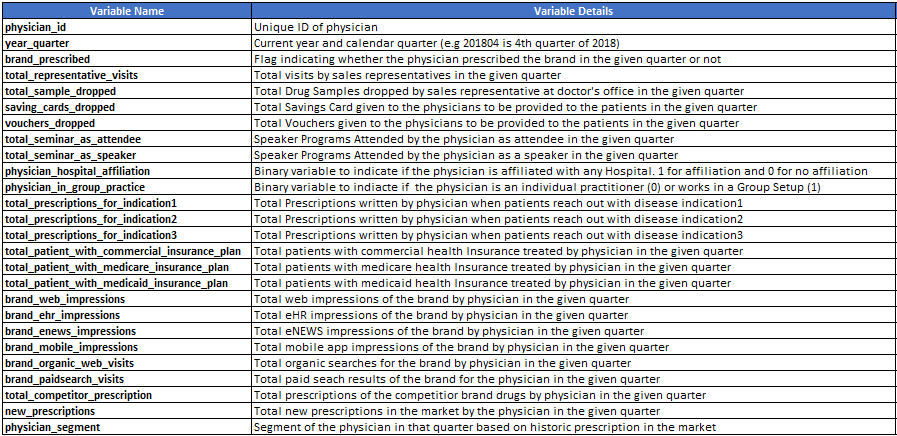

Train Physician Data

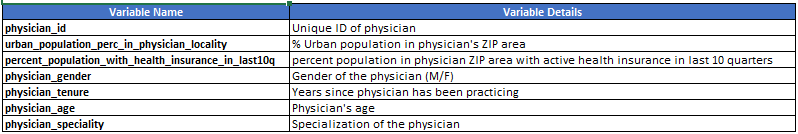

# Hypothesis Generation

Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.


*   Does the total visits by sales representatives help in predicting/identifying the right physician for drug sales?
*   Does the no of Samples dropped help in predicting/identifying the right physician?
*   Does the no of Saving Cards dropped help in predicting/identifying the right physician?
*   Does the vouchers help in predicting/identifying the right physician?
*   Does the no of seminars attended by Physician help in predicting/identifying the right physician?
*   Does the physician Hospital affiliation help in predicting/identifying the right physician?
*   There are a whole lot of questions we put inorder to get the right information based on which we can proceed further





# Importing Necessary Libraries

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Uploading the data

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!unzip Drug_Marketing.zip -d Drug_Marketing

Archive:  Drug_Marketing.zip
  inflating: Drug_Marketing/Drug_Marketing/Column_explanation_file.xlsx  
  inflating: Drug_Marketing/Drug_Marketing/sample_sub.csv  
  inflating: Drug_Marketing/Drug_Marketing/test.xlsm  
  inflating: Drug_Marketing/Drug_Marketing/train_physician_activity.csv  
  inflating: Drug_Marketing/Drug_Marketing/train_physician_data.csv  


In [ ]:
os.chdir('/content/Drug_Marketing/Drug_Marketing')
cwd=os.getcwd()
print("cwd:",cwd)

cwd: /content/Drug_Marketing/Drug_Marketing


In [ ]:
train_data_df = pd.read_csv('train_physician_data.csv')
train_activity_df = pd.read_csv('train_physician_activity.csv')
#test_df = pd.read_csv(test_file_path)
#sub_df = pd.read_csv('sample_sub.csv')

# EDA
**1. Brief look at the dataset.**

In [ ]:
train_data_df.head(3)
train_activity_df.head(5)

Unnamed: 0  physician_id  ...  physician_age  physician_speciality
0  0           1             ...  83             nephrology          
1  1           2             ...  71             other               
2  2           3             ...  71             nephrology          

[3 rows x 8 columns]

Unnamed: 0  physician_id  ...  new_prescriptions  physician_segment
0  0           1             ...  0                  NaN              
1  1           1             ...  0                  NaN              
2  2           1             ...  19                 NaN              
3  3           1             ...  18                 NaN              
4  4           1             ...  37                 NaN              

[5 rows x 27 columns]

Looking at the 2 files we see that the first file train_data is about an individual physician information and train_activity is about the physician activity across multiple quarters

So we will merge these 2 files and perform the EDA on the combined file.

And also we will remove index column from each file and only have the variables listed as per the data description.

In [ ]:
all_data = pd.merge(train_activity_df, train_data_df,on='physician_id', how='left')
all_data.head()

Unnamed: 0_x  physician_id  ...  physician_age  physician_speciality
0  0             1             ...  83             nephrology          
1  1             1             ...  83             nephrology          
2  2             1             ...  83             nephrology          
3  3             1             ...  83             nephrology          
4  4             1             ...  83             nephrology          

[5 rows x 34 columns]

In [ ]:
all_data.drop(all_data.columns[all_data.columns.str.contains('^Unna')], axis=1,inplace=True)

In [ ]:
all_data.head()

physician_id  year_quarter  ...  physician_age  physician_speciality
0  1             201802        ...  83             nephrology          
1  1             201803        ...  83             nephrology          
2  1             201804        ...  83             nephrology          
3  1             201901        ...  83             nephrology          
4  1             201902        ...  83             nephrology          

[5 rows x 32 columns]

**2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [ ]:
CLASS_LABEL = 'physician_segment'

In [ ]:
print(f'\nTrain contains {all_data.shape[0]} samples and {all_data.shape[1]} variables')

features = [c for c in all_data.columns if c not in [CLASS_LABEL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 100000 samples and 32 variables

The dataset contains 31 features


**3. Null Values**

Lets have a look at the percentage of null values in each variable.

In [ ]:
null_values_per_variable = 100 * (all_data.isnull().sum()/all_data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

physician_segment                                      51.1
physician_speciality                                   0.0 
total_patient_with_commercial_insurance_plan           0.0 
year_quarter                                           0.0 
brand_prescribed                                       0.0 
total_representative_visits                            0.0 
total_sample_dropped                                   0.0 
saving_cards_dropped                                   0.0 
vouchers_dropped                                       0.0 
total_seminar_as_attendee                              0.0 
total_seminar_as_speaker                               0.0 
physician_hospital_affiliation                         0.0 
physician_in_group_practice                            0.0 
total_prescriptions_for_indication1                    0.0 
total_prescriptions_for_indication2                    0.0 
total_prescriptions_for_indication3                    0.0 
total_patient_with_medicare_insurance_pl

1. So we see that except 1 column, all other variables are good
2. So we will go ahead and remove null records from the column (Physician Segment) as it might not add any value to our model in the future.

In [ ]:
all_data.dropna(subset=['physician_segment'], inplace=True)

**4. Target Distribution**

Lets have a look at the distribution of Target. As it is a multi-class classification, lets check the class imbalance as well

In [ ]:
all_data[CLASS_LABEL].value_counts(normalize=True)

High         0.383768
Very High    0.324240
Medium       0.188377
Low          0.103615
Name: physician_segment, dtype: float64

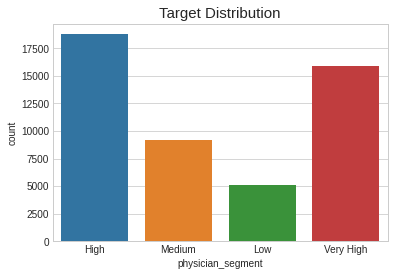

In [ ]:
x = sns.countplot(all_data[CLASS_LABEL])
x = plt.title("Target Distribution", fontsize=15)

We observe that the categories 'High' and 'Very High' constitute major part of the records (approx 71%) and Low and Medium constitute (29%).

**5. Different Data Types in DataFrame**

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48902 entries, 5 to 99999
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   physician_id                                         48902 non-null  int64  
 1   year_quarter                                         48902 non-null  int64  
 2   brand_prescribed                                     48902 non-null  int64  
 3   total_representative_visits                          48902 non-null  int64  
 4   total_sample_dropped                                 48902 non-null  int64  
 5   saving_cards_dropped                                 48902 non-null  int64  
 6   vouchers_dropped                                     48902 non-null  int64  
 7   total_seminar_as_attendee                            48902 non-null  int64  
 8   total_seminar_as_speaker                             48902 non-nul

We see that majority of variables are numeric and one variable is object/string

**6. Unique values in each variable**

In [ ]:
all_data.nunique()

physician_id                                           9955
year_quarter                                           6   
brand_prescribed                                       2   
total_representative_visits                            49  
total_sample_dropped                                   262 
saving_cards_dropped                                   53  
vouchers_dropped                                       32  
total_seminar_as_attendee                              6   
total_seminar_as_speaker                               31  
physician_hospital_affiliation                         2   
physician_in_group_practice                            2   
total_prescriptions_for_indication1                    655 
total_prescriptions_for_indication2                    716 
total_prescriptions_for_indication3                    735 
total_patient_with_commercial_insurance_plan           717 
total_patient_with_medicare_insurance_plan             1052
total_patient_with_medicaid_insurance_pl

We see that there are a lot of columns which have multiple values which would need EDA against each variable to see the correlation

**Analyzing Each Variable & their relationships**

There are two types of features that we have:

1. Categorical
2. Numerical

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'physician_segment'

But before jumping straight into analysis, lets have a look at the variables we have and try to ask some questions ourselves

In [ ]:
#Reference : My Own Blogs : https://vishal-aiml164.medium.com/can-you-predict-the-number-of-likes-a-youtube-video-will-get-82403aa012eb

**Separating Categorical and Numerical Variables**

In [ ]:
category_cols =['physician_gender','physician_speciality','year_quarter']
category_cols

['physician_gender', 'physician_speciality', 'year_quarter']

In [ ]:
numerical_cols = [c for c in features if c not in category_cols]
numerical_cols.remove('physician_id')
numerical_cols

['brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'saving_cards_dropped',
 'vouchers_dropped',
 'total_seminar_as_attendee',
 'total_seminar_as_speaker',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_prescriptions_for_indication3',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'brand_web_impressions',
 'brand_ehr_impressions',
 'brand_enews_impressions',
 'brand_mobile_impressions',
 'brand_organic_web_visits',
 'brand_paidsearch_visits',
 'total_competitor_prescription',
 'new_prescriptions',
 'urban_population_perc_in_physician_locality',
 'percent_population_with_health_insurance_in_last10q',
 'physician_tenure',
 'physician_age']

In [ ]:
all_data.to_csv(r'all_data.csv', index = False)


Checking data distribution based on Quarters

In [ ]:
all_data['year_quarter'].value_counts(sort=True, ascending=True)

201902    191 
201903    9665
201904    9682
202001    9704
202002    9722
202003    9938
Name: year_quarter, dtype: int64

Removing records for the Quarter 201902 as we see that very less records are present in that Quarter and we can analyze in better way for 5 Quarters

In [ ]:
# Reference : https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

In [ ]:
drop_rec = all_data[ all_data['year_quarter']==201902].index
all_data.drop(drop_rec, inplace = True)

In [ ]:
def func_year_quarter(row):
    if (row['year_quarter']==201903):
        val='201903-Q3'
    elif (row['year_quarter']==201904):   
        val='201904-Q4' 
    elif (row['year_quarter']==202001):   
        val='202001-Q1'
    elif (row['year_quarter']==202002):   
        val='202002-Q2'
    elif (row['year_quarter']==202003):   
        val='202003-Q3'                                                                                                                                                                    
    else:
        val='UNKNOWN'
    return val
all_data['year_quarter']=all_data.apply(func_year_quarter,axis=1)      

In [ ]:
all_data['year_quarter'].value_counts(sort=True, ascending=True)

201903-Q3    9665
201904-Q4    9682
202001-Q1    9704
202002-Q2    9722
202003-Q3    9938
Name: year_quarter, dtype: int64

upon general observation we have seen that physician_gender has 3 values. so checking the distribution again

In [ ]:
all_data['physician_gender'].value_counts(sort=True, ascending=True)

Unknown    8    
F          21192
M          27511
Name: physician_gender, dtype: int64

In [ ]:
drop_rec = all_data[ all_data['physician_gender']=='Unknown'].index
all_data.drop(drop_rec, inplace = True)

In [ ]:
all_data['physician_gender'].value_counts(sort=True, ascending=True)

F    21192
M    27511
Name: physician_gender, dtype: int64

Removing physician_id column as it is ID column

In [ ]:
all_data.drop(['physician_id'], axis = 1,inplace = True)

# Categorical Features

**Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

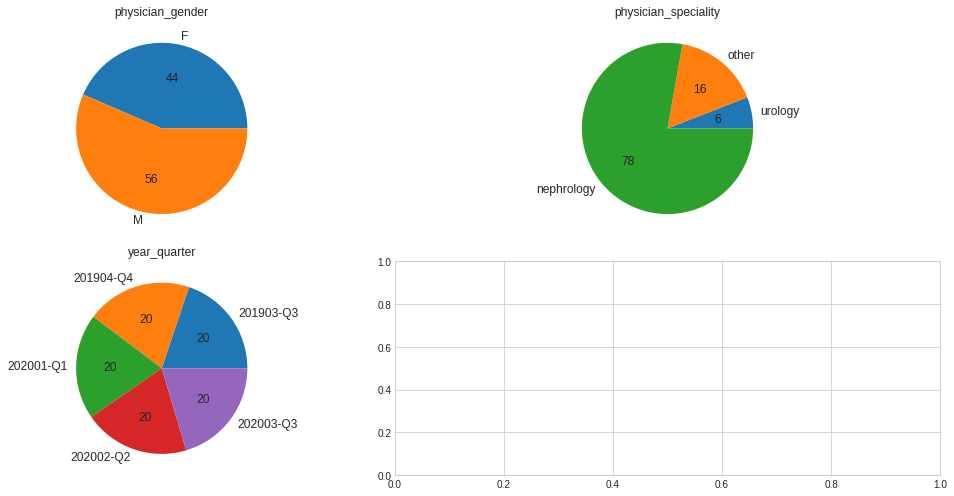

In [ ]:
category_cols =['physician_gender','physician_speciality','year_quarter']
numerical_cols = [c for c in features if c not in category_cols]
numerical_cols.remove('physician_id')
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes = [ax for axes_row in axes for ax in axes_row]

for i, j in enumerate(all_data[category_cols]):
    _ = all_data[j].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], fontsize=12, title=j, autopct='%.0f')
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

**So below are the inferences we get from the pie chart**

1. Physician Gender has almost same distribution
2. Physician_speciality has nephrology with 78%, urology 6% and other 16%

# Bivariate Analysis Relationships with Target

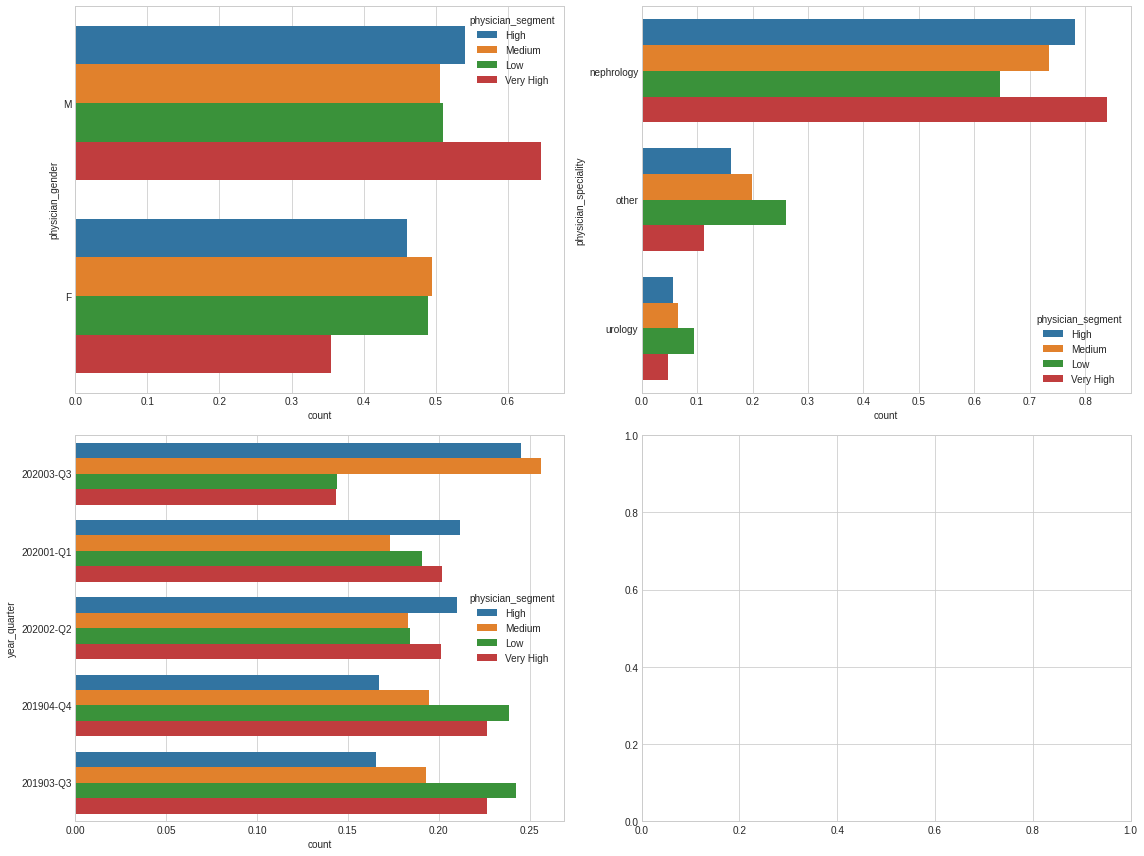

In [ ]:
#Reference : My own Blogs : https://vishal-aiml164.medium.com/diabetes-patient-re-admission-prediction-ddd2e288f0ed
# https://www.analyticsvidhya.com/blog/2020/10/the-clever-ingredient-that-decide-the-rise-and-the-fall-of-your-machine-learning-model-exploratory-data-analysis/
category_cols =['physician_gender','physician_speciality','year_quarter']
numerical_cols = [c for c in features if c not in category_cols]
numerical_cols.remove('physician_id')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(all_data[category_cols]):
    fltr_High = all_data[CLASS_LABEL] == 'High'
    fltr_Medium = all_data[CLASS_LABEL] == 'Medium'
    fltr_Low = all_data[CLASS_LABEL] == 'Low'
    fltr_Very_High = all_data[CLASS_LABEL] == 'Very High'

    vc_High = all_data[fltr_High][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)
    vc_Medium = all_data[fltr_Medium][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)
    vc_Low = all_data[fltr_Low][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)
    vc_Very_High = all_data[fltr_Very_High][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_High[CLASS_LABEL] = 'High'
    vc_Medium[CLASS_LABEL] = 'Medium'
    vc_Low[CLASS_LABEL] = 'Low'
    vc_Very_High[CLASS_LABEL] = 'Very High'

    df = pd.concat([vc_High, vc_Medium, vc_Low, vc_Very_High]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=CLASS_LABEL, ax=axes[i])
    
_ = plt.tight_layout()

# So Let's Try to answer few Hypothesis Questions

**Q. Does gender impact on the physician segment?**

A. Yes, as you can see Very High and High Category percentage is more for Male population, than Female. For Female population we see that Medium and Low constitute more percentage

**Q. Does physician speciality impact on the physician segment?**

A. Yes the physician with speciality in nephrology tend to prescribe more than the urology and others category

**Q. Does year_quarter impact on the physician segment?**

A. No

# Numerical Features

**1. Univariate Analysis - Boxplots**

Boxplot can be used to see the spread of the numerical variables, and identify outliers

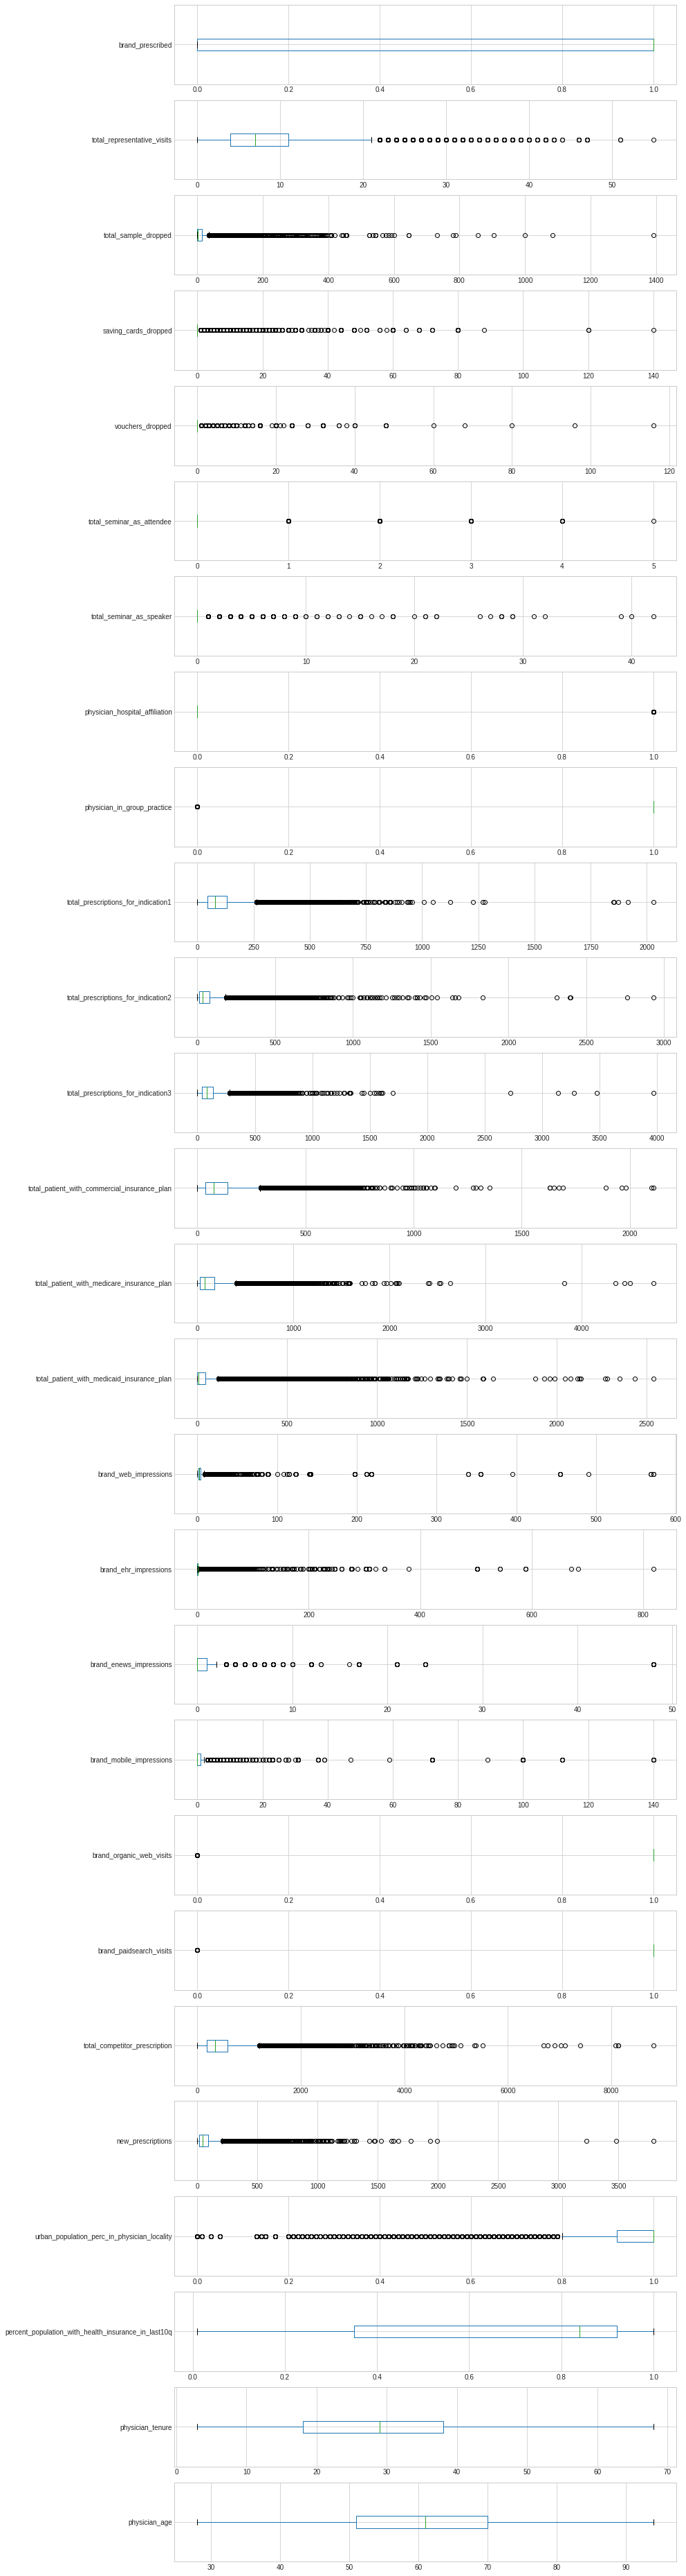

In [ ]:
fig, axes = plt.subplots(27, 1, figsize=(13, 68))
for i, j in enumerate(numerical_cols):
  y = all_data[[j]].boxplot(ax=axes[i], vert=False)

From the above Graphs we are unable to find the distributions properly, so lets take each variable individually and check its distribution against the class Label

**Bi-Variate Analysis - against each set of variables**


As there are multiple numerical variables we can divide them into sub-sections as below:

1. brand_prescribed (binary column)
2. medical representative and seminar related columns
3. hospital affiliation and prescription for indication related columns
4. patient with insurance related columns
5. brand impresssions, web visits related search columns
6. competitor prescriptions related columns
7. Locality related columns
8. physician age and tenure related columns


# 1. Let's Take the first numerical variable (**brand_prescribed**) which has binary data and compare against class labels

In [ ]:
# Reference : https://stackoverflow.com/questions/59204445/how-to-do-i-groupby-count-and-then-plot-a-bar-chart-in-pandas
grp_by_brand_prescribed = all_data.groupby(['brand_prescribed','year_quarter' ,'physician_segment']).size().unstack()

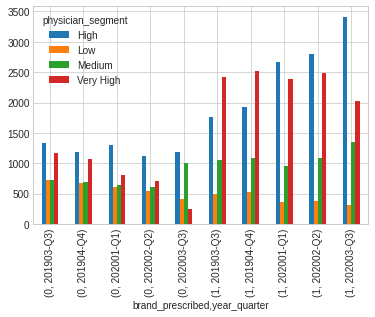

In [ ]:
grp_by_brand_prescribed.plot(kind = 'bar')

# 2. Lets take **medical representative related columns** and perform its analysis with class label

a. total_representative_visits

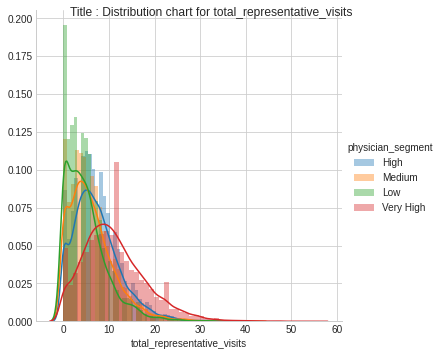

In [ ]:
g = sns.FacetGrid(all_data[['total_representative_visits','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_representative_visits") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_representative_visits ')
plt.show();

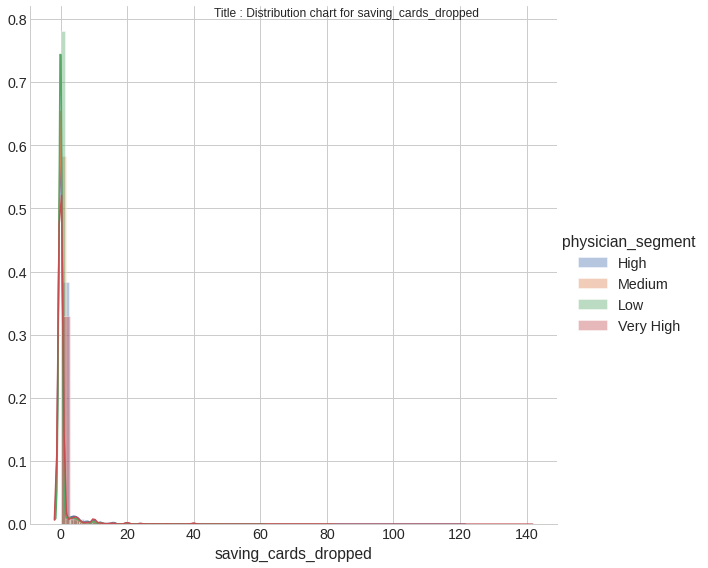

In [ ]:
g = sns.FacetGrid(all_data[['saving_cards_dropped','physician_segment']], hue="physician_segment", size=8) \
.map(sns.distplot, "saving_cards_dropped") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for saving_cards_dropped ')
plt.show();

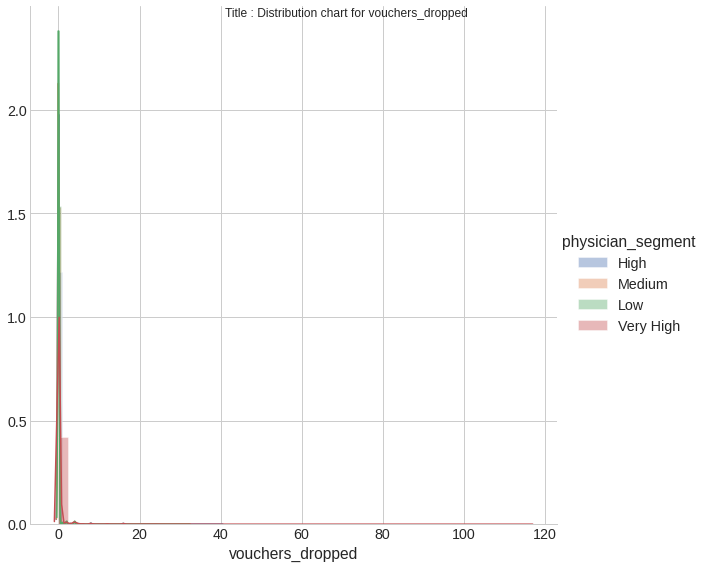

In [ ]:
g = sns.FacetGrid(all_data[['vouchers_dropped','physician_segment']], hue="physician_segment", size=8) \
.map(sns.distplot, "vouchers_dropped") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for vouchers_dropped ')
plt.show();

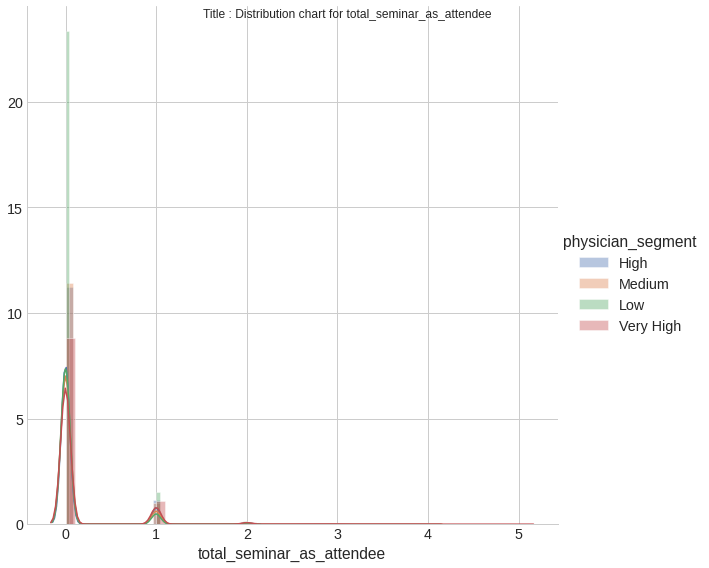

In [ ]:
g = sns.FacetGrid(all_data[['total_seminar_as_attendee','physician_segment']], hue="physician_segment", size=8) \
.map(sns.distplot, "total_seminar_as_attendee") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_seminar_as_attendee ')
plt.show();

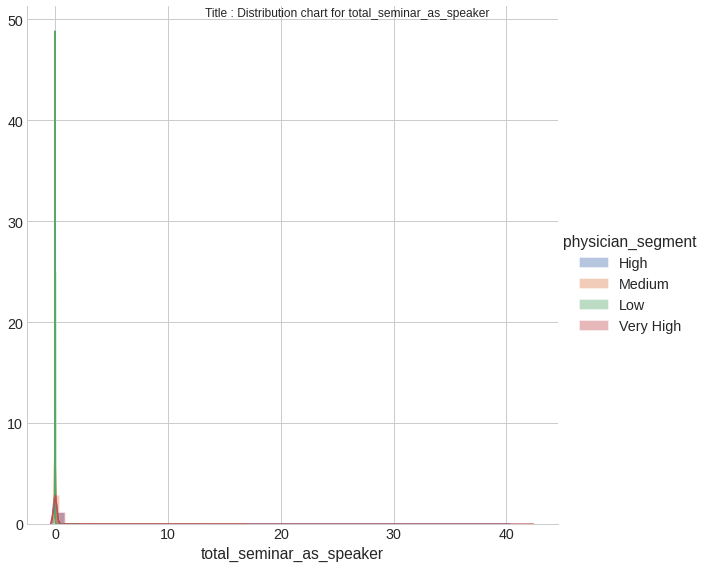

In [ ]:


g = sns.FacetGrid(all_data[['total_seminar_as_speaker','physician_segment']], hue="physician_segment", size=8) \
.map(sns.distplot, "total_seminar_as_speaker") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_seminar_as_speaker ')
plt.show();

# LETS ANALYZE THE DATASET USING STATISTICAL METHODS

In [ ]:
def func_physician_segment_ordinal(row):
    if (row['physician_segment']=='Very High'):
        val=4   
    elif (row['physician_segment']=='High'):   
        val=3   
    elif (row['physician_segment']=='Medium'):   
        val=2                                                                                                                                                                      
    else:
        val=1
    return val

In [ ]:
all_data['physician_segment_ordinal']=all_data.apply(func_physician_segment_ordinal,axis=1)  

In [ ]:
# Reference: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
columns_to_analyze = ['total_representative_visits','total_sample_dropped','saving_cards_dropped',
                      'vouchers_dropped','total_seminar_as_attendee','total_seminar_as_speaker']
df_to_analyze = all_data[columns_to_analyze]
vif_to_analyze = pd.DataFrame()
vif_to_analyze["VIF_FACTOR"] = [variance_inflation_factor(df_to_analyze.iloc[:,:].values, i) for i in range(df_to_analyze.shape[1])]
vif_to_analyze["FEATURES"] = df_to_analyze.columns
vif_to_analyze

VIF_FACTOR                     FEATURES
0  1.373779    total_representative_visits
1  1.275857    total_sample_dropped       
2  1.081863    saving_cards_dropped       
3  1.031396    vouchers_dropped           
4  1.142113    total_seminar_as_attendee  
5  1.008255    total_seminar_as_speaker

We see that VIF Score is < 10, which is good and it represents no multi-colinearity problem between variables

Now, we will calculate the **pearson correlation coeff** values between variable and target variable, which will help us in figuring out how much a variable can impact the **TARGET LABEL**

In [ ]:
data_total_representative_visits = all_data.loc[:,'total_representative_visits']
data_total_sample_dropped = all_data.loc[:,'total_sample_dropped']
data_saving_cards_dropped = all_data.loc[:,'saving_cards_dropped']
data_vouchers_dropped = all_data.loc[:,'vouchers_dropped']
data_total_seminar_as_attendee = all_data.loc[:,'total_seminar_as_attendee']
data_total_seminar_as_speaker = all_data.loc[:,'total_seminar_as_speaker']

tgt_data = all_data.loc[:,'physician_segment_ordinal']

In [ ]:
# Reference : https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

from numpy.random import seed
from scipy.stats import pearsonr
seed(1)
coef_val, p_val = pearsonr(data_total_representative_visits,tgt_data)
print('pearsons correlation coefficient: %.3f' % coef_val)
# interpret the significance
alpha_val = 0.05
if p_val > alpha_val:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_val)
 

pearsons correlation coefficient: 0.335
Samples are correlated (reject H0) p=0.000


In [ ]:
df_feature_set1 = pd.DataFrame(all_data, columns = ['physician_segment_ordinal','total_representative_visits', 
                                                    'total_sample_dropped', 'saving_cards_dropped','vouchers_dropped',
                                                    'total_seminar_as_attendee','total_seminar_as_speaker'])

<Figure size 576x432 with 0 Axes>

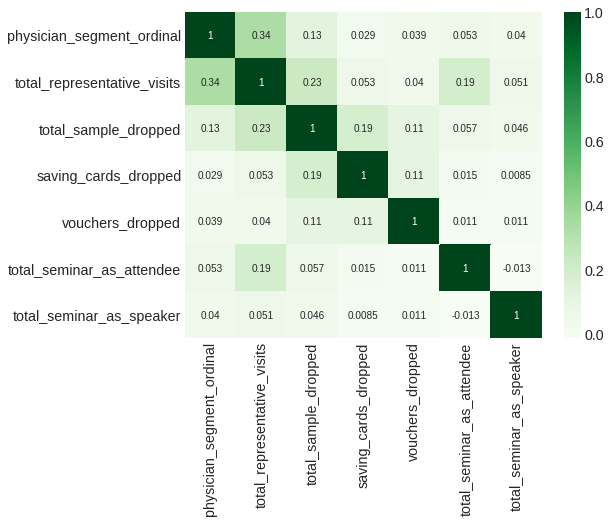

In [ ]:
plt.figure(figsize=(8,6))
df_feature_set1_cor = df_feature_set1.corr()
sns.heatmap(df_feature_set1_cor, annot=True, cmap=plt.cm.Greens)
plt.show() 

# APPLYING LOG TRANSFORMATION AND CHECKING THE DISTRIBUTION

---



In [ ]:
all_data['log_total_representative_visits'] = np.log1p(all_data['total_representative_visits']) 
all_data['log_total_sample_dropped'] = np.log1p(all_data['total_sample_dropped']) 
all_data['log_saving_cards_dropped'] = np.log1p(all_data['saving_cards_dropped']) 
all_data['log_vouchers_dropped'] = np.log1p(all_data['vouchers_dropped']) 
all_data['log_total_seminar_as_attendee'] = np.log1p(all_data['total_seminar_as_attendee']) 
all_data['log_total_seminar_as_speaker'] = np.log1p(all_data['total_seminar_as_speaker']) 

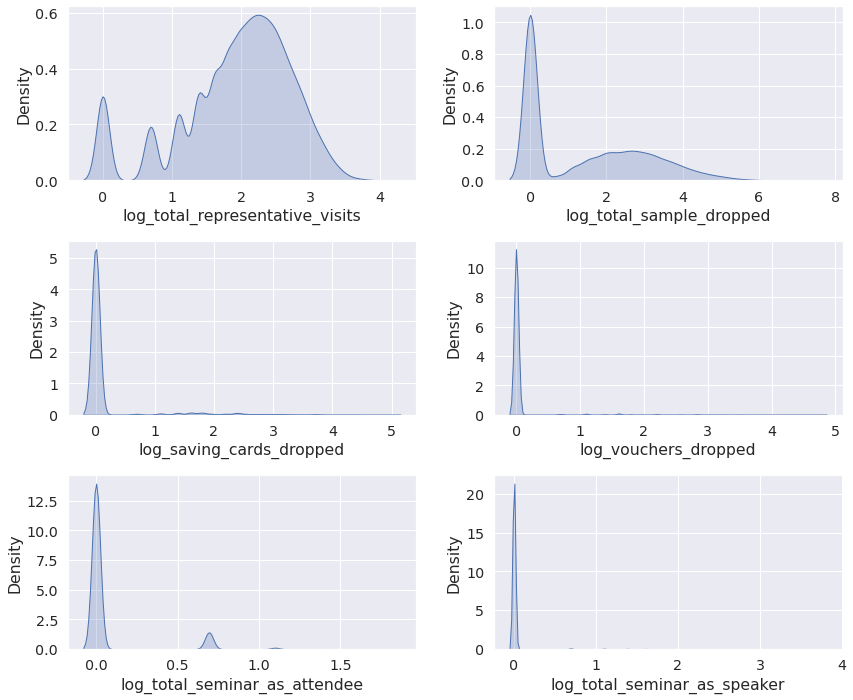

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(['log_total_representative_visits', 'log_total_sample_dropped', 'log_saving_cards_dropped',
                       'log_vouchers_dropped','log_total_seminar_as_attendee','log_total_seminar_as_speaker']):
  plot = sns.kdeplot(data=all_data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

# CHECKING THE PERECENTILE OF DATA AND CHECKING ITS DISTRIBUTION WITHIN 90th PERCENTILE

In [ ]:
print("25th percentile of total_representative_visits",np.percentile(all_data[['total_representative_visits']], 25))
print("50th percentile of total_representative_visits",np.percentile(all_data[['total_representative_visits']], 50))
print("75th percentile of total_representative_visits",np.percentile(all_data[['total_representative_visits']], 75))
print("90th percentile of total_representative_visits",np.percentile(all_data[['total_representative_visits']], 90))
print("95th percentile of total_representative_visits",np.percentile(all_data[['total_representative_visits']], 95))
print("100th percentile of total_representative_visits",np.percentile(all_data[['total_representative_visits']], 100))

25th percentile of total_representative_visits 4.0
50th percentile of total_representative_visits 7.0
75th percentile of total_representative_visits 11.0
90th percentile of total_representative_visits 16.0
95th percentile of total_representative_visits 20.0
100th percentile of total_representative_visits 55.0


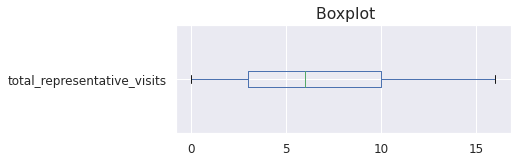

In [ ]:
np90_total_representative_visits= all_data[all_data['total_representative_visits']<=16]['total_representative_visits']
plot = np90_total_representative_visits.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

As you can see this distribution which is 90% of total data, has a median lying at 6 and IQR lies between 3.5 to 10

# PLOTTING AGAINST THE TARGET VARIABLE AND CHECKING THE DISTRIBUTION

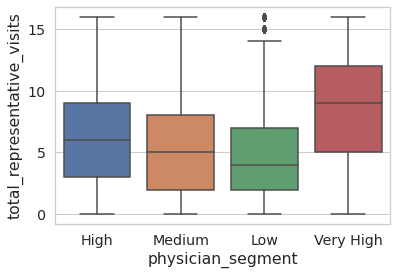

In [ ]:
np90_total_representative_visits1= all_data[all_data['total_representative_visits']<=16][['total_representative_visits','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_representative_visits', data = np90_total_representative_visits1)	

From this we can infer that for categories 'Very High' and 'High' median is > 6 and IQR lies at higher range, and for categories 'Medium' and 'Low' median is <= 5 and IQR range is certainly lower

**SIMILAR KIND OF ANALYSIS FOR THE REMAINING 5 COLUMNS**

In [ ]:
print("25th percentile of total_sample_dropped",np.percentile(all_data[['total_sample_dropped']], 25))
print("50th percentile of total_sample_dropped",np.percentile(all_data[['total_sample_dropped']], 50))
print("75th percentile of total_sample_dropped",np.percentile(all_data[['total_sample_dropped']], 75))
print("90th percentile of total_sample_dropped",np.percentile(all_data[['total_sample_dropped']], 90))
print("95th percentile of total_sample_dropped",np.percentile(all_data[['total_sample_dropped']], 95))
print("100th percentile of total_sample_dropped",np.percentile(all_data[['total_sample_dropped']], 100))

25th percentile of total_sample_dropped 0.0
50th percentile of total_sample_dropped 2.0
75th percentile of total_sample_dropped 14.0
90th percentile of total_sample_dropped 38.0
95th percentile of total_sample_dropped 64.0
100th percentile of total_sample_dropped 1392.0


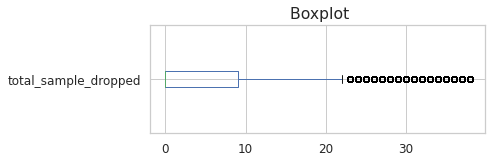

In [ ]:
np90_total_sample_dropped= all_data[all_data['total_sample_dropped']<=38]['total_sample_dropped']
plot = np90_total_sample_dropped.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

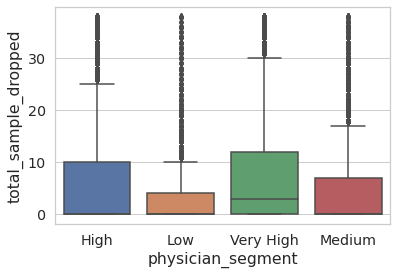

In [ ]:
np90_total_sample_dropped1= all_data[all_data['total_sample_dropped']<=38][['total_sample_dropped','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_sample_dropped', data = np90_total_sample_dropped1)	

Same could be inferred here as well if the samples dropped are more then there is more chance that the doctor will prescribe

In [ ]:
print("25th percentile of saving_cards_dropped",np.percentile(all_data[['saving_cards_dropped']], 25))
print("50th percentile of saving_cards_dropped",np.percentile(all_data[['saving_cards_dropped']], 50))
print("75th percentile of saving_cards_dropped",np.percentile(all_data[['saving_cards_dropped']], 75))
print("90th percentile of saving_cards_dropped",np.percentile(all_data[['saving_cards_dropped']], 90))
print("95th percentile of saving_cards_dropped",np.percentile(all_data[['saving_cards_dropped']], 95))
print("100th percentile of saving_cards_dropped",np.percentile(all_data[['saving_cards_dropped']], 100))

25th percentile of saving_cards_dropped 0.0
50th percentile of saving_cards_dropped 0.0
75th percentile of saving_cards_dropped 0.0
90th percentile of saving_cards_dropped 0.0
95th percentile of saving_cards_dropped 5.0
100th percentile of saving_cards_dropped 140.0


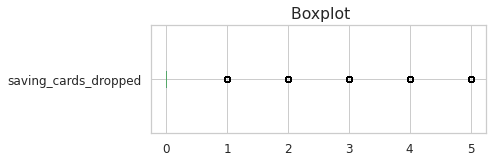

In [ ]:
np90_saving_cards_dropped= all_data[all_data['saving_cards_dropped']<=5]['saving_cards_dropped']
plot = np90_saving_cards_dropped.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

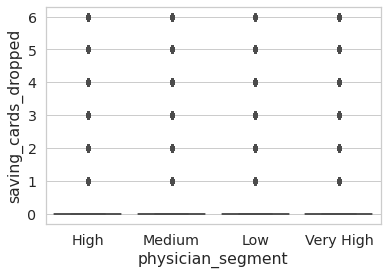

In [ ]:
np90_saving_cards_dropped1= all_data[all_data['saving_cards_dropped']<=5][['saving_cards_dropped','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'saving_cards_dropped', data = np90_saving_cards_dropped1)	

In [ ]:
print("25th percentile of vouchers_dropped",np.percentile(all_data[['vouchers_dropped']], 25))
print("50th percentile of vouchers_dropped",np.percentile(all_data[['vouchers_dropped']], 50))
print("75th percentile of vouchers_dropped",np.percentile(all_data[['vouchers_dropped']], 75))
print("90th percentile of vouchers_dropped",np.percentile(all_data[['vouchers_dropped']], 90))
print("95th percentile of vouchers_dropped",np.percentile(all_data[['vouchers_dropped']], 95))
print("100th percentile of vouchers_dropped",np.percentile(all_data[['vouchers_dropped']], 100))

25th percentile of vouchers_dropped 0.0
50th percentile of vouchers_dropped 0.0
75th percentile of vouchers_dropped 0.0
90th percentile of vouchers_dropped 0.0
95th percentile of vouchers_dropped 0.0
100th percentile of vouchers_dropped 116.0


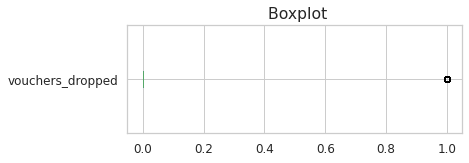

In [ ]:
np90_vouchers_dropped= all_data[all_data['vouchers_dropped']<=1]['vouchers_dropped']
plot = np90_vouchers_dropped.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

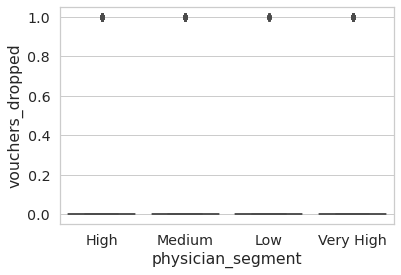

In [ ]:
np90_vouchers_dropped1= all_data[all_data['vouchers_dropped']<=1][['vouchers_dropped','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'vouchers_dropped', data = np90_vouchers_dropped1)	

For saving_cards_dropped and vouchers_dropped more than 95% of data is 0 and we cannot make much inference from it

In [ ]:
print("25th percentile of total_seminar_as_attendee",np.percentile(all_data[['total_seminar_as_attendee']], 25))
print("50th percentile of total_seminar_as_attendee",np.percentile(all_data[['total_seminar_as_attendee']], 50))
print("75th percentile of total_seminar_as_attendee",np.percentile(all_data[['total_seminar_as_attendee']], 75))
print("90th percentile of total_seminar_as_attendee",np.percentile(all_data[['total_seminar_as_attendee']], 90))
print("95th percentile of total_seminar_as_attendee",np.percentile(all_data[['total_seminar_as_attendee']], 95))
print("100th percentile of total_seminar_as_attendee",np.percentile(all_data[['total_seminar_as_attendee']], 100))

25th percentile of total_seminar_as_attendee 0.0
50th percentile of total_seminar_as_attendee 0.0
75th percentile of total_seminar_as_attendee 0.0
90th percentile of total_seminar_as_attendee 1.0
95th percentile of total_seminar_as_attendee 1.0
100th percentile of total_seminar_as_attendee 5.0


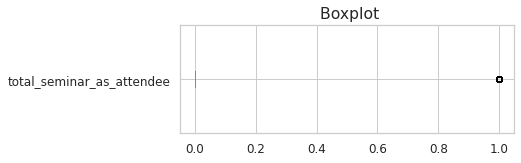

In [ ]:
np90_total_seminar_as_attendee= all_data[all_data['total_seminar_as_attendee']<=1]['total_seminar_as_attendee']
plot = np90_total_seminar_as_attendee.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

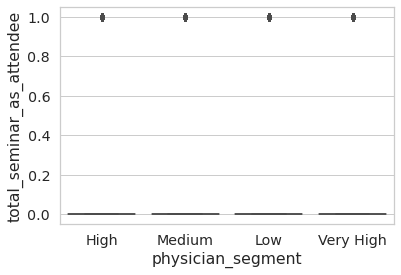

In [ ]:
np90_total_seminar_as_attendee1= all_data[all_data['total_seminar_as_attendee']<=1][['total_seminar_as_attendee','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_seminar_as_attendee', data = np90_total_seminar_as_attendee1)	

In [ ]:
print("25th percentile of total_seminar_as_speaker",np.percentile(all_data[['total_seminar_as_speaker']], 25))
print("50th percentile of total_seminar_as_speaker",np.percentile(all_data[['total_seminar_as_speaker']], 50))
print("75th percentile of total_seminar_as_speaker",np.percentile(all_data[['total_seminar_as_speaker']], 75))
print("90th percentile of total_seminar_as_speaker",np.percentile(all_data[['total_seminar_as_speaker']], 90))
print("95th percentile of total_seminar_as_speaker",np.percentile(all_data[['total_seminar_as_speaker']], 95))
print("100th percentile of total_seminar_as_speaker",np.percentile(all_data[['total_seminar_as_speaker']], 100))

25th percentile of total_seminar_as_speaker 0.0
50th percentile of total_seminar_as_speaker 0.0
75th percentile of total_seminar_as_speaker 0.0
90th percentile of total_seminar_as_speaker 0.0
95th percentile of total_seminar_as_speaker 0.0
100th percentile of total_seminar_as_speaker 42.0


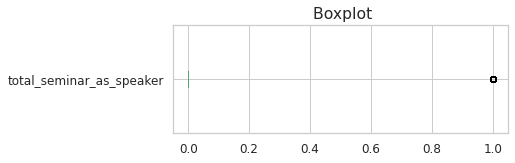

In [ ]:
np90_total_seminar_as_speaker= all_data[all_data['total_seminar_as_speaker']<=1]['total_seminar_as_speaker']
plot = np90_total_seminar_as_speaker.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

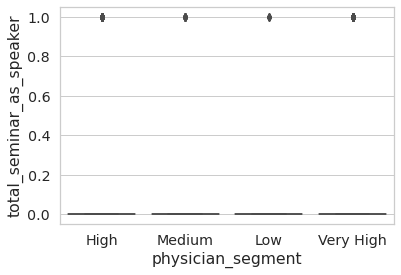

In [ ]:
np90_total_seminar_as_speaker1= all_data[all_data['total_seminar_as_speaker']<=1][['total_seminar_as_speaker','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_seminar_as_speaker', data = np90_total_seminar_as_speaker1)	

For total_seminar_as_attendee and total_seminar_as_speaker more than 95% of data is 0 and we cannot make much inference from it

# So Let's Try to answer few more Hypothesis Questions

**Q. Does brand_prescribed impact on the physician segment?**

A. Yes, if brand is prescribed the previous quarters, it is more likely that physician will prescribe it in next quarter.


**Q. Does total_representative_visits impact on the physician segment?**

- Yes, from the distribution chart we see that if the no of representative visits are high, then there is maximum chance that the physician will prescribe the medicine.

- In addition to it, have even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the 2 categories 'Very High' and 'High' 

- Good correlation also with the target label

**Q. Does total_sample_dropped impact on the physician segment?**

- Yes, it certainly impacts as we are seeing maximum distribution for the 2 segments (Very High and High Categories)

- Same could be inferred here as well if the no of samples dropped are more then there is more chance that the doctor will prescribe

**Q. Does saving_cards_dropped impact on the physician segment?**

- It really does not make much of a difference as the distribution is peaked at 0 only

- For saving_cards_dropped more than 95% of data is 0 and we cannot make much inference from it

- Not much of correlation also with the target label

**Q. Does vouchers_dropped impact on the physician segment?**

- It really does not make much of a difference as the distribution is peaked at 0 only

- For vouchers_dropped more than 95% of data is 0 and we cannot make much inference from it

- Not much of correlation also with the target label

**Q. Does total_seminar_as_attendee impact on the physician segment?**

- It really does not make much of a difference as the distribution is peaked at 0 only

- For total_semiar_as_attendee  more than 95% of data is 0 and we cannot make much inference from it

- Not much of correlation also with the target label

**Q. Does total_seminar_as_speaker impact on the physician segment?**

- It really does not make much of a difference as the distribution is peaked at 0 only

- For total_seminar_as_speaker more than 95% of data is 0 and we cannot make much inference from it

- Not much of correlation also with the target label

# 3. Lets take **physician affiliation** and **prescription indicator** columns  and perform its analysis with class label

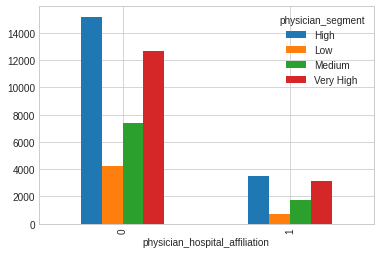

In [ ]:
grp_by_hospital_affiliation = all_data.groupby(['physician_hospital_affiliation','physician_segment']).size().unstack()
grp_by_hospital_affiliation.plot(kind = 'bar')

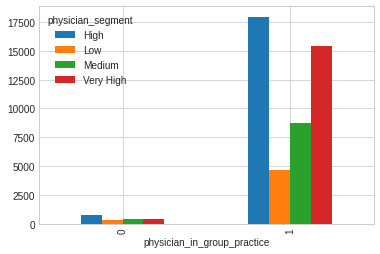

In [ ]:
grp_by_hospital_affiliation = all_data.groupby(['physician_in_group_practice','physician_segment']).size().unstack()
grp_by_hospital_affiliation.plot(kind = 'bar')

# So Let's Try to answer few more Hypothesis Questions

**Q. Does physician_hospital_affiliation impact on the physician segment?**

A. Yes, it looks like lot of physicians do not have hospital affiliations and are more likely to prescribe the medicines.

**Q. Does physician_in_group_practice impact on the physician segment?**

A. Yes, from the distribution chart we see that if the physician is in group setup then he is more likely to prescribe the medicine.

**prescription indicator columns**

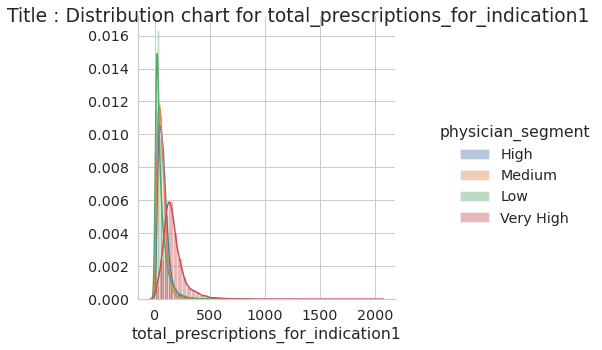

In [ ]:
g = sns.FacetGrid(all_data[['total_prescriptions_for_indication1','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_prescriptions_for_indication1") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_prescriptions_for_indication1 ')
plt.show();

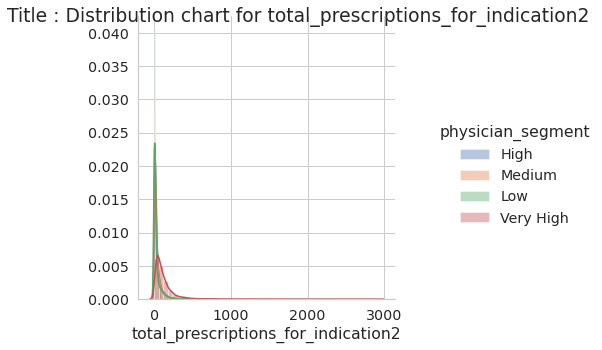

In [ ]:
g = sns.FacetGrid(all_data[['total_prescriptions_for_indication2','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_prescriptions_for_indication2") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_prescriptions_for_indication2 ')
plt.show();

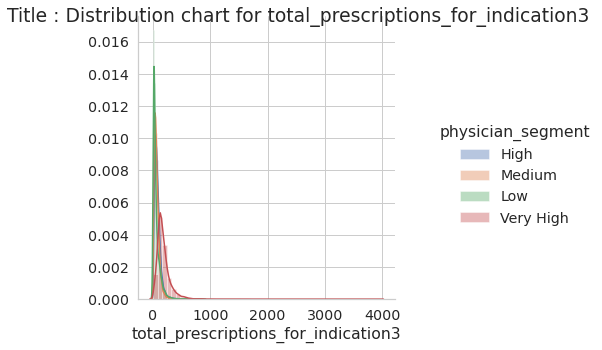

In [ ]:
g = sns.FacetGrid(all_data[['total_prescriptions_for_indication3','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_prescriptions_for_indication3") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_prescriptions_for_indication3 ')
plt.show();

# Lets again perform all the steps as we saw before 
- VIF
- pearson corr coef calculation, 
- correlation matrix, 
- Percentile check, 
- and Boxplots against 90th percentile dataset

In [ ]:
columns_to_analyze = ['total_prescriptions_for_indication1','total_prescriptions_for_indication2','total_prescriptions_for_indication3']
df_to_analyze = all_data[columns_to_analyze]
vif_to_analyze = pd.DataFrame()
vif_to_analyze["VIF_FACTOR"] = [variance_inflation_factor(df_to_analyze.iloc[:,:].values, i) for i in range(df_to_analyze.shape[1])]
vif_to_analyze["FEATURES"] = df_to_analyze.columns
vif_to_analyze

VIF_FACTOR                             FEATURES
0  5.526473    total_prescriptions_for_indication1
1  2.775663    total_prescriptions_for_indication2
2  6.051339    total_prescriptions_for_indication3

It looks like 'total_prescriptions_for_indication1' and 'total_prescriptions_for_indication3' do have colinearity issue as the value seems to be high

In [ ]:
data_total_prescriptions_for_indication1 = all_data.loc[:,'total_prescriptions_for_indication1']
data_total_prescriptions_for_indication2 = all_data.loc[:,'total_prescriptions_for_indication2']
data_total_prescriptions_for_indication3 = all_data.loc[:,'total_prescriptions_for_indication3']

In [ ]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(1)
coef_val, p_val = pearsonr(data_total_prescriptions_for_indication1,tgt_data)
print('pearsons correlation coefficient: %.3f' % coef_val)
# interpret the significance
alpha_val = 0.05
if p_val > alpha_val:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_val)

pearsons correlation coefficient: 0.465
Samples are correlated (reject H0) p=0.000


In [ ]:
df_feature_set2 = pd.DataFrame(all_data, columns = ['physician_segment_ordinal','total_prescriptions_for_indication1', 
                                                    'total_prescriptions_for_indication2', 'total_prescriptions_for_indication3'])

<Figure size 432x288 with 0 Axes>

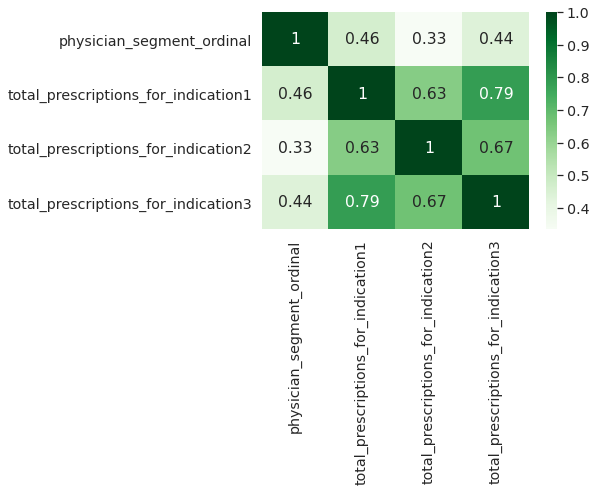

In [ ]:
plt.figure(figsize=(6,4))
df_feature_set2_cor = df_feature_set2.corr()
sns.heatmap(df_feature_set2_cor, annot=True, cmap=plt.cm.Greens)
plt.show()    

- We can infer from pearson correlation coef values and the correlation matrix that all 3 columns have a greater impact on target label.

- In addition to it, we also see that total_prescriptions_for_indication1 is higly colinear to total_prescriptions_for_indication3. So during our modeling we will remove total_prescriptions_for_indication3

In [ ]:
all_data['log_total_prescriptions_for_indication1'] = np.log1p(all_data['total_prescriptions_for_indication1']) 
all_data['log_total_prescriptions_for_indication2'] = np.log1p(all_data['total_prescriptions_for_indication2']) 
all_data['log_total_prescriptions_for_indication3'] = np.log1p(all_data['total_prescriptions_for_indication3']) 


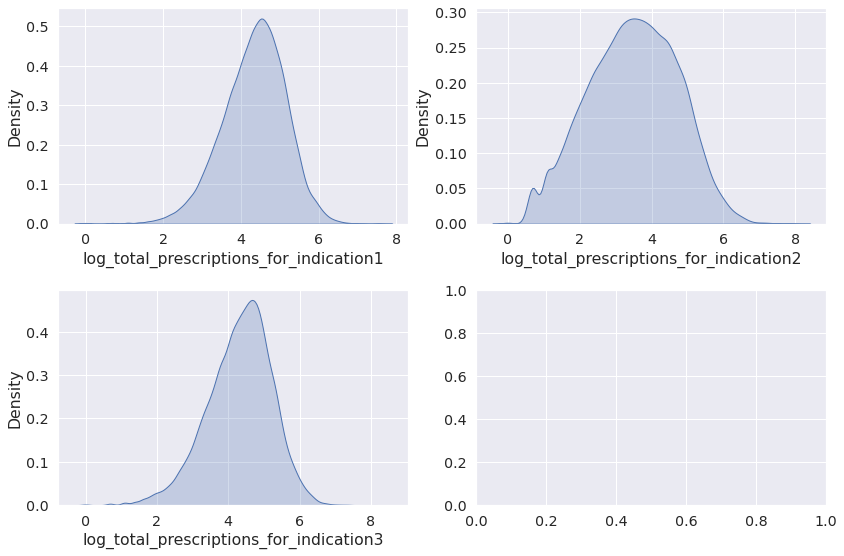

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(['log_total_prescriptions_for_indication1', 
                                                    'log_total_prescriptions_for_indication2', 'log_total_prescriptions_for_indication3']):
  plot = sns.kdeplot(data=all_data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

In [ ]:
print("25th percentile of total_prescriptions_for_indication1",np.percentile(all_data[['total_prescriptions_for_indication1']], 25))
print("50th percentile of total_prescriptions_for_indication1",np.percentile(all_data[['total_prescriptions_for_indication1']], 50))
print("75th percentile of total_prescriptions_for_indication1",np.percentile(all_data[['total_prescriptions_for_indication1']], 75))
print("90th percentile of total_prescriptions_for_indication1",np.percentile(all_data[['total_prescriptions_for_indication1']], 90))
print("95th percentile of total_prescriptions_for_indication1",np.percentile(all_data[['total_prescriptions_for_indication1']], 95))
print("100th percentile of total_prescriptions_for_indication1",np.percentile(all_data[['total_prescriptions_for_indication1']], 100))

25th percentile of total_prescriptions_for_indication1 45.0
50th percentile of total_prescriptions_for_indication1 80.0
75th percentile of total_prescriptions_for_indication1 132.0
90th percentile of total_prescriptions_for_indication1 200.0
95th percentile of total_prescriptions_for_indication1 255.0
100th percentile of total_prescriptions_for_indication1 2029.0


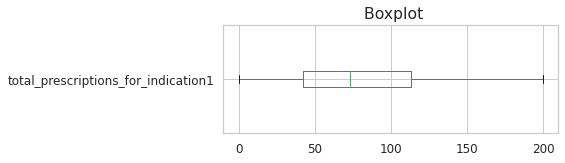

In [ ]:
np90_total_prescriptions_for_indication1= all_data[all_data['total_prescriptions_for_indication1']<=200]['total_prescriptions_for_indication1']
plot = np90_total_prescriptions_for_indication1.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

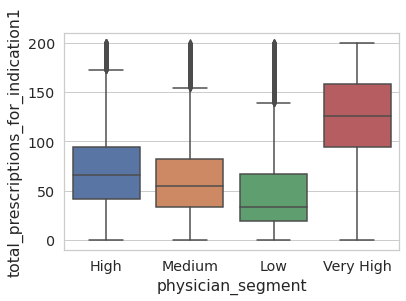

In [ ]:
np90_total_prescriptions_for_indication11= all_data[all_data['total_prescriptions_for_indication1']<=200][['total_prescriptions_for_indication1','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_prescriptions_for_indication1', data = np90_total_prescriptions_for_indication11)

In [ ]:
print("25th percentile of total_prescriptions_for_indication2",np.percentile(all_data[['total_prescriptions_for_indication2']], 25))
print("50th percentile of total_prescriptions_for_indication2",np.percentile(all_data[['total_prescriptions_for_indication2']], 50))
print("75th percentile of total_prescriptions_for_indication2",np.percentile(all_data[['total_prescriptions_for_indication2']], 75))
print("90th percentile of total_prescriptions_for_indication2",np.percentile(all_data[['total_prescriptions_for_indication2']], 90))
print("95th percentile of total_prescriptions_for_indication2",np.percentile(all_data[['total_prescriptions_for_indication2']], 95))
print("100th percentile of total_prescriptions_for_indication2",np.percentile(all_data[['total_prescriptions_for_indication2']], 100))

25th percentile of total_prescriptions_for_indication2 12.0
50th percentile of total_prescriptions_for_indication2 32.0
75th percentile of total_prescriptions_for_indication2 80.0
90th percentile of total_prescriptions_for_indication2 156.0
95th percentile of total_prescriptions_for_indication2 224.0
100th percentile of total_prescriptions_for_indication2 2932.0


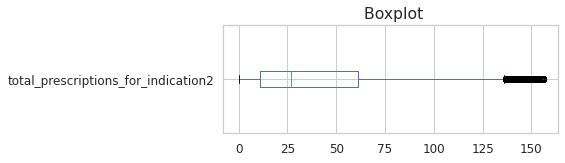

In [ ]:
np90_total_prescriptions_for_indication2= all_data[all_data['total_prescriptions_for_indication2']<=156]['total_prescriptions_for_indication2']
plot = np90_total_prescriptions_for_indication2.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

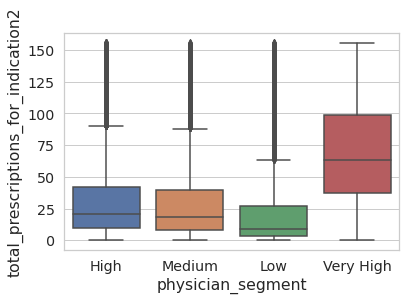

In [ ]:
np90_total_prescriptions_for_indication21= all_data[all_data['total_prescriptions_for_indication2']<=156][['total_prescriptions_for_indication2','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_prescriptions_for_indication2', data = np90_total_prescriptions_for_indication21)	

In [ ]:
print("25th percentile of total_prescriptions_for_indication3",np.percentile(all_data[['total_prescriptions_for_indication3']], 25))
print("50th percentile of total_prescriptions_for_indication3",np.percentile(all_data[['total_prescriptions_for_indication3']], 50))
print("75th percentile of total_prescriptions_for_indication3",np.percentile(all_data[['total_prescriptions_for_indication3']], 75))
print("90th percentile of total_prescriptions_for_indication3",np.percentile(all_data[['total_prescriptions_for_indication3']], 90))
print("95th percentile of total_prescriptions_for_indication3",np.percentile(all_data[['total_prescriptions_for_indication3']], 95))
print("100th percentile of total_prescriptions_for_indication3",np.percentile(all_data[['total_prescriptions_for_indication3']], 100))

25th percentile of total_prescriptions_for_indication3 41.0
50th percentile of total_prescriptions_for_indication3 80.0
75th percentile of total_prescriptions_for_indication3 137.0
90th percentile of total_prescriptions_for_indication3 215.0
95th percentile of total_prescriptions_for_indication3 283.0
100th percentile of total_prescriptions_for_indication3 3967.0


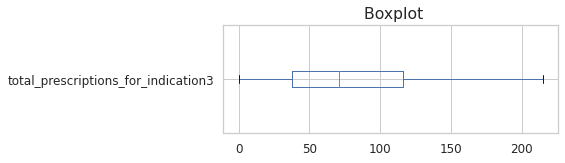

In [ ]:
np90_total_prescriptions_for_indication3= all_data[all_data['total_prescriptions_for_indication3']<=215]['total_prescriptions_for_indication3']
plot = np90_total_prescriptions_for_indication3.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

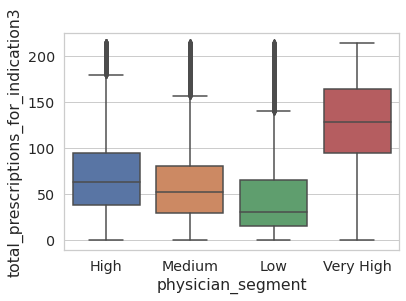

In [ ]:
np90_total_prescriptions_for_indication31= all_data[all_data['total_prescriptions_for_indication3']<=215][['total_prescriptions_for_indication3','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_prescriptions_for_indication3', data = np90_total_prescriptions_for_indication31)	

# So Let's Try to answer few more Hypothesis Questions


**Q. How Does total_prescriptions_for_indication1, total_prescriptions_for_indication2, total_prescriptions_for_indication3 impact on the physician segment?**

- Have plotted distribution plots for total_prescriptions_for_indication1, and total_prescriptions_for_indication3 and have seen that we have  greater distribution for the segment 'Very High' and 'High', and lesser distribution for 'Low' and 'Medium'. For total_prescriptions_for_indication2 we do not see any proper distribution to infer.

- In addition to it, have even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the the IQR Range for the  category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling

- Moreover, we also see that total_prescriptions_for_indication1 is higly colinear to total_prescriptions_for_indication3. So during our modeling we will remove total_prescriptions_for_indication3




# 4. Lets take **insurance** columns and perform its analysis with class label

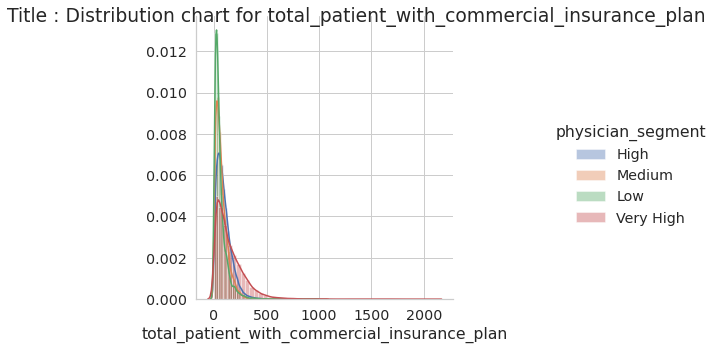

In [ ]:
g = sns.FacetGrid(all_data[['total_patient_with_commercial_insurance_plan','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_patient_with_commercial_insurance_plan") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_patient_with_commercial_insurance_plan ')
plt.show();

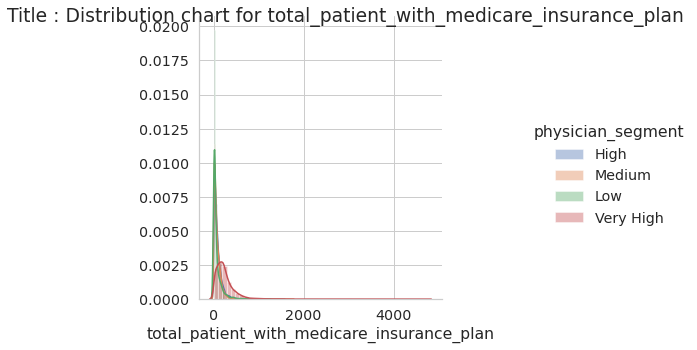

In [ ]:
g = sns.FacetGrid(all_data[['total_patient_with_medicare_insurance_plan','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_patient_with_medicare_insurance_plan") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_patient_with_medicare_insurance_plan ')
plt.show();

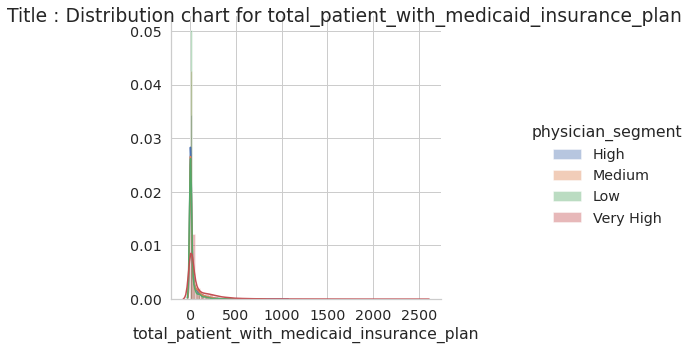

In [ ]:
g = sns.FacetGrid(all_data[['total_patient_with_medicaid_insurance_plan','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_patient_with_medicaid_insurance_plan") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_patient_with_medicaid_insurance_plan ')
plt.show();

# Lets again perform all the steps as we saw before

- VIF
- pearson corr coef calculation,
- correlation matrix,
- Percentile check,
- and Boxplots against 90th percentile dataset

In [ ]:
columns_to_analyze = ['total_patient_with_commercial_insurance_plan','total_patient_with_medicare_insurance_plan','total_patient_with_medicaid_insurance_plan']
df_to_analyze = all_data[columns_to_analyze]
vif_to_analyze = pd.DataFrame()
vif_to_analyze["VIF_FACTOR"] = [variance_inflation_factor(df_to_analyze.iloc[:,:].values, i) for i in range(df_to_analyze.shape[1])]
vif_to_analyze["FEATURES"] = df_to_analyze.columns
vif_to_analyze


VIF_FACTOR                                      FEATURES
0  1.439089    total_patient_with_commercial_insurance_plan
1  1.948826    total_patient_with_medicare_insurance_plan  
2  1.474437    total_patient_with_medicaid_insurance_plan

In [ ]:
data_total_patient_with_commercial_insurance_plan = all_data.loc[:,'total_patient_with_commercial_insurance_plan']
data_total_patient_with_medicare_insurance_plan = all_data.loc[:,'total_patient_with_medicare_insurance_plan']
data_total_patient_with_medicaid_insurance_plan = all_data.loc[:,'total_patient_with_medicaid_insurance_plan']

In [ ]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(1)
coef_val, p_val = pearsonr(data_total_patient_with_commercial_insurance_plan,tgt_data)
print('pearsons correlation coefficient: %.3f' % coef_val)
# interpret the significance
alpha_val = 0.05
if p_val > alpha_val:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_val)

pearsons correlation coefficient: 0.312
Samples are correlated (reject H0) p=0.000


In [ ]:
df_feature_set3 = pd.DataFrame(all_data, columns = ['physician_segment_ordinal','total_patient_with_commercial_insurance_plan','total_patient_with_medicare_insurance_plan', 
                                                    'total_patient_with_medicaid_insurance_plan'])

<Figure size 576x432 with 0 Axes>

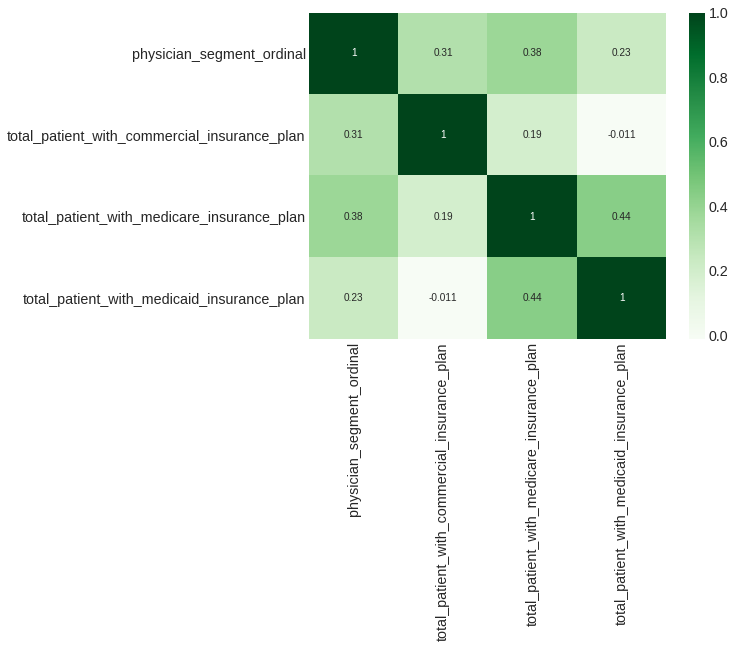

In [ ]:
plt.figure(figsize=(8,6))
df_feature_set3_cor = df_feature_set3.corr()
sns.heatmap(df_feature_set3_cor, annot=True, cmap=plt.cm.Greens)
plt.show()  

In [ ]:
all_data['log_total_patient_with_commercial_insurance_plan'] = np.log1p(all_data['total_patient_with_commercial_insurance_plan']) 
all_data['log_total_patient_with_medicare_insurance_plan'] = np.log1p(all_data['total_patient_with_medicare_insurance_plan']) 
all_data['log_total_patient_with_medicaid_insurance_plan'] = np.log1p(all_data['total_patient_with_medicaid_insurance_plan']) 

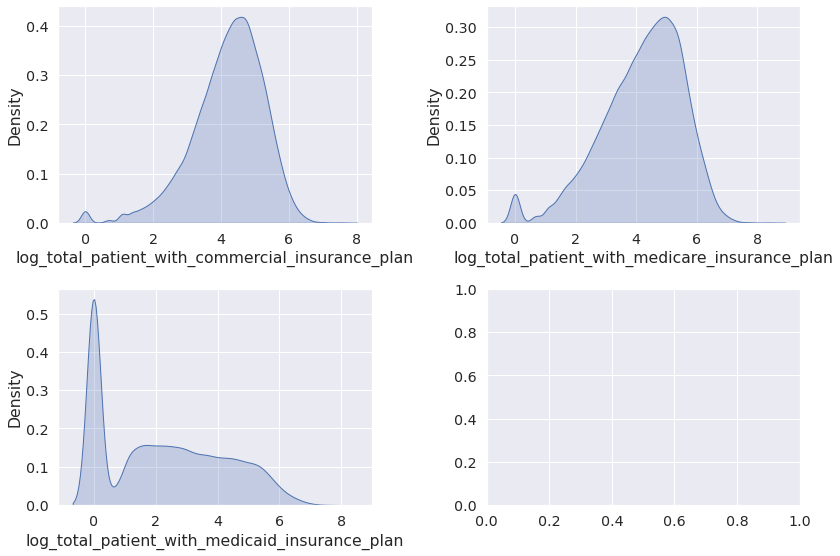

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(['log_total_patient_with_commercial_insurance_plan', 
                        'log_total_patient_with_medicare_insurance_plan', 'log_total_patient_with_medicaid_insurance_plan']):
  plot = sns.kdeplot(data=all_data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

In [ ]:
print("25th percentile of total_patient_with_commercial_insurance_plan",np.percentile(all_data[['total_patient_with_commercial_insurance_plan']], 25))
print("50th percentile of total_patient_with_commercial_insurance_plan",np.percentile(all_data[['total_patient_with_commercial_insurance_plan']], 50))
print("75th percentile of total_patient_with_commercial_insurance_plan",np.percentile(all_data[['total_patient_with_commercial_insurance_plan']], 75))
print("90th percentile of total_patient_with_commercial_insurance_plan",np.percentile(all_data[['total_patient_with_commercial_insurance_plan']], 90))
print("95th percentile of total_patient_with_commercial_insurance_plan",np.percentile(all_data[['total_patient_with_commercial_insurance_plan']], 95))
print("100th percentile of total_patient_with_commercial_insurance_plan",np.percentile(all_data[['total_patient_with_commercial_insurance_plan']], 100))

25th percentile of total_patient_with_commercial_insurance_plan 36.0
50th percentile of total_patient_with_commercial_insurance_plan 75.0
75th percentile of total_patient_with_commercial_insurance_plan 138.0
90th percentile of total_patient_with_commercial_insurance_plan 224.0
95th percentile of total_patient_with_commercial_insurance_plan 291.0
100th percentile of total_patient_with_commercial_insurance_plan 2109.0


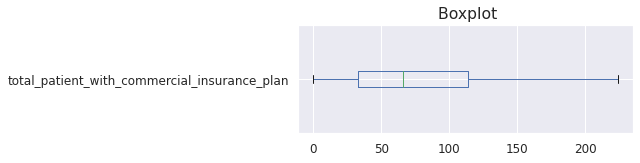

In [ ]:
np90_total_patient_with_commercial_insurance_plan= all_data[all_data['total_patient_with_commercial_insurance_plan']<=224]['total_patient_with_commercial_insurance_plan']
plot = np90_total_patient_with_commercial_insurance_plan.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

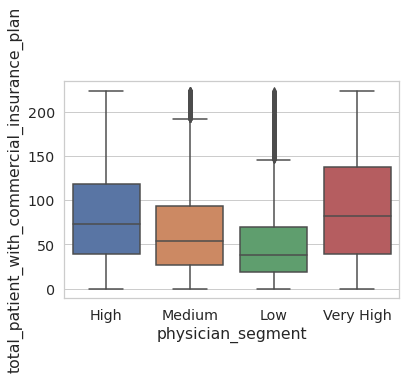

In [ ]:
np90_total_patient_with_commercial_insurance_plan1= all_data[all_data['total_patient_with_commercial_insurance_plan']<=224][['total_patient_with_commercial_insurance_plan','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_patient_with_commercial_insurance_plan', data = np90_total_patient_with_commercial_insurance_plan1)	

In [ ]:
print("25th percentile of total_patient_with_medicare_insurance_plan",np.percentile(all_data[['total_patient_with_medicare_insurance_plan']], 25))
print("50th percentile of total_patient_with_medicare_insurance_plan",np.percentile(all_data[['total_patient_with_medicare_insurance_plan']], 50))
print("75th percentile of total_patient_with_medicare_insurance_plan",np.percentile(all_data[['total_patient_with_medicare_insurance_plan']], 75))
print("90th percentile of total_patient_with_medicare_insurance_plan",np.percentile(all_data[['total_patient_with_medicare_insurance_plan']], 90))
print("95th percentile of total_patient_with_medicare_insurance_plan",np.percentile(all_data[['total_patient_with_medicare_insurance_plan']], 95))
print("100th percentile of total_patient_with_medicare_insurance_plan",np.percentile(all_data[['total_patient_with_medicare_insurance_plan']], 100))

25th percentile of total_patient_with_medicare_insurance_plan 28.0
50th percentile of total_patient_with_medicare_insurance_plan 79.0
75th percentile of total_patient_with_medicare_insurance_plan 178.0
90th percentile of total_patient_with_medicare_insurance_plan 313.0
95th percentile of total_patient_with_medicare_insurance_plan 432.0
100th percentile of total_patient_with_medicare_insurance_plan 4746.0


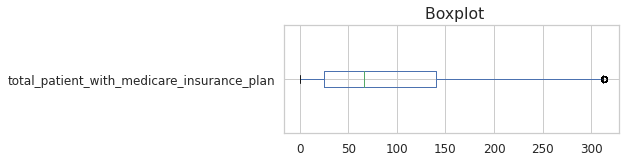

In [ ]:
np90_total_patient_with_medicare_insurance_plan= all_data[all_data['total_patient_with_medicare_insurance_plan']<=313]['total_patient_with_medicare_insurance_plan']
plot = np90_total_patient_with_medicare_insurance_plan.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

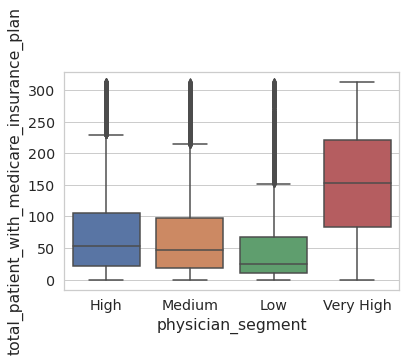

In [ ]:
np90_total_patient_with_medicare_insurance_plan1= all_data[all_data['total_patient_with_medicare_insurance_plan']<=313][['total_patient_with_medicare_insurance_plan','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_patient_with_medicare_insurance_plan', data = np90_total_patient_with_medicare_insurance_plan1)	

In [ ]:
print("25th percentile of total_patient_with_medicaid_insurance_plan",np.percentile(all_data[['total_patient_with_medicaid_insurance_plan']], 25))
print("50th percentile of total_patient_with_medicaid_insurance_plan",np.percentile(all_data[['total_patient_with_medicaid_insurance_plan']], 50))
print("75th percentile of total_patient_with_medicaid_insurance_plan",np.percentile(all_data[['total_patient_with_medicaid_insurance_plan']], 75))
print("90th percentile of total_patient_with_medicaid_insurance_plan",np.percentile(all_data[['total_patient_with_medicaid_insurance_plan']], 90))
print("95th percentile of total_patient_with_medicaid_insurance_plan",np.percentile(all_data[['total_patient_with_medicaid_insurance_plan']], 95))
print("100th percentile of total_patient_with_medicaid_insurance_plan",np.percentile(all_data[['total_patient_with_medicaid_insurance_plan']], 100))

25th percentile of total_patient_with_medicaid_insurance_plan 0.0
50th percentile of total_patient_with_medicaid_insurance_plan 7.0
75th percentile of total_patient_with_medicaid_insurance_plan 46.0
90th percentile of total_patient_with_medicaid_insurance_plan 162.0
95th percentile of total_patient_with_medicaid_insurance_plan 260.90000000000146
100th percentile of total_patient_with_medicaid_insurance_plan 2538.0


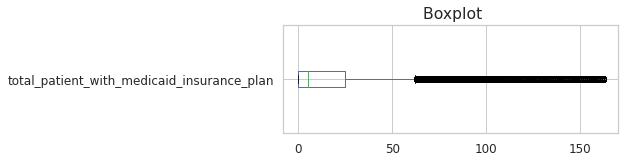

In [ ]:
np90_total_patient_with_medicaid_insurance_plan= all_data[all_data['total_patient_with_medicaid_insurance_plan']<=162]['total_patient_with_medicaid_insurance_plan']
plot = np90_total_patient_with_medicaid_insurance_plan.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

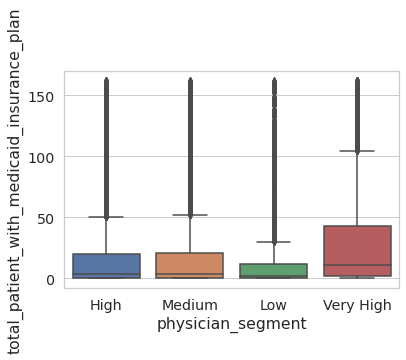

In [ ]:
np90_total_patient_with_medicaid_insurance_plan1= all_data[all_data['total_patient_with_medicaid_insurance_plan']<=162][['total_patient_with_medicaid_insurance_plan','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_patient_with_medicaid_insurance_plan', data = np90_total_patient_with_medicaid_insurance_plan1)	

# So Let's Try to answer few more Hypothesis Questions

**Q. Does total_patient_with_commercial_insurance_plan impact on the physician segment?**

- Yes, certainly we see fatter/denser distributions for 'High' and 'Very High' category

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the 2 categories 'Very High' and 'High'. we see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

- Moderate correlation with the target label

- We see more no of outliers in the dataset

**Q. Does total_patient_with_medicare_insurance_plan impact on the physician segment?**

- Yes, certainly we see fatter/denser distributions for 'Very High' category

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the 2 categories 'Very High' and 'High'. we see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

- Moderate correlation with the target label

- We see more no of outliers in the dataset

**Q. Does total_patient_with_medicaid_insurance_plan impact on the physician segment?**

- Moderate correlation with the target label

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High' and for remaining categories it is almost same

- We see more no of outliers in the dataset

# 5. Lets take **brand impresssions, web visits related** search columns columns and perform its analysis with class label

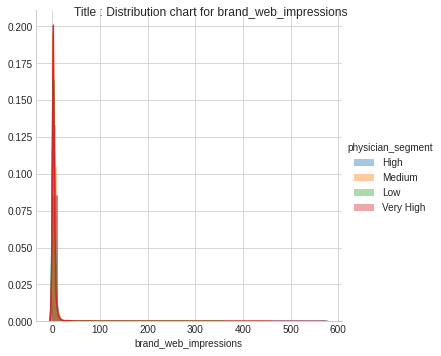

In [ ]:
g = sns.FacetGrid(all_data[['brand_web_impressions','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "brand_web_impressions") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for brand_web_impressions ')
plt.show();

As we could not infer much, lets check the PDF and CDF 

In [ ]:
physician_segment_very_high = all_data.loc[all_data["physician_segment"] == 'Very High'];
physician_segment_high = all_data.loc[all_data["physician_segment"] == 'High'];
physician_segment_medium = all_data.loc[all_data["physician_segment"] == 'Medium'];
physician_segment_low = all_data.loc[all_data["physician_segment"] == 'Low'];

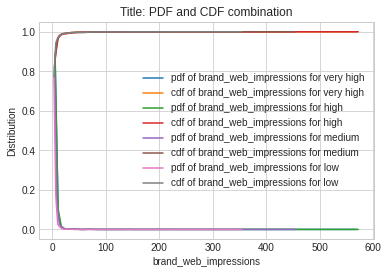

In [ ]:
counts, bin_edges = np.histogram(physician_segment_very_high['brand_web_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#plt.show();

counts, bin_edges = np.histogram(physician_segment_high['brand_web_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(physician_segment_medium['brand_web_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(physician_segment_low['brand_web_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['pdf of brand_web_impressions for very high','cdf of brand_web_impressions for very high',
            'pdf of brand_web_impressions for high','cdf of brand_web_impressions for high',
            'pdf of brand_web_impressions for medium','cdf of brand_web_impressions for medium',
            'pdf of brand_web_impressions for low','cdf of brand_web_impressions for low'])
plt.title('Title: PDF and CDF combination')

plt.xlabel('brand_web_impressions')
plt.ylabel('Distribution')

plt.show();

Now, we could say that almost all of them follow the same sequence, and more than 90% data we have brand_web_impressions less than 10 and only 10% data has more than 10 brand_web_impressions.

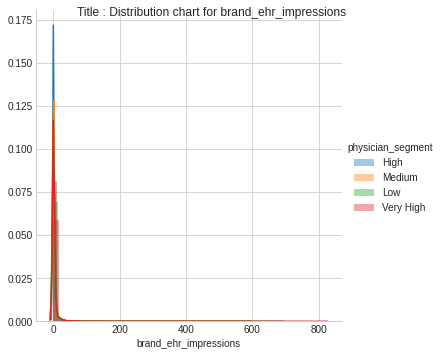

In [ ]:
g = sns.FacetGrid(all_data[['brand_ehr_impressions','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "brand_ehr_impressions") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for brand_ehr_impressions ')
plt.show();

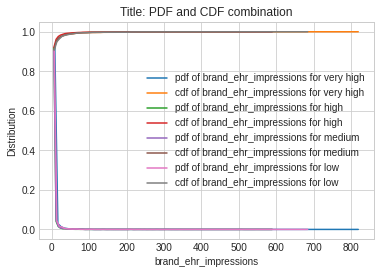

In [ ]:
counts, bin_edges = np.histogram(physician_segment_very_high['brand_ehr_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#plt.show();

counts, bin_edges = np.histogram(physician_segment_high['brand_ehr_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(physician_segment_medium['brand_ehr_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(physician_segment_low['brand_ehr_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['pdf of brand_ehr_impressions for very high','cdf of brand_ehr_impressions for very high',
            'pdf of brand_ehr_impressions for high','cdf of brand_ehr_impressions for high',
            'pdf of brand_ehr_impressions for medium','cdf of brand_ehr_impressions for medium',
            'pdf of brand_ehr_impressions for low','cdf of brand_ehr_impressions for low'])
plt.title('Title: PDF and CDF combination')

plt.xlabel('brand_ehr_impressions')
plt.ylabel('Distribution')

plt.show();

Now, we could say that almost all of them follow the same sequence, and more than 90% data we have brand_web_impressions less than 5 and only 10% data has more than 5 brand_web_impressions.

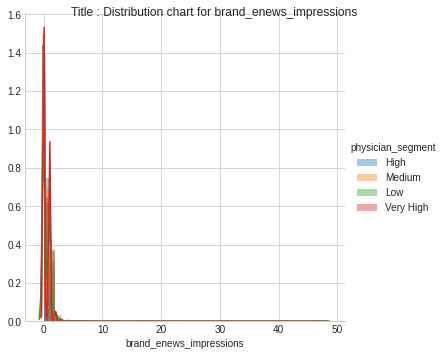

In [ ]:
g = sns.FacetGrid(all_data[['brand_enews_impressions','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "brand_enews_impressions") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for brand_enews_impressions ')
plt.show();

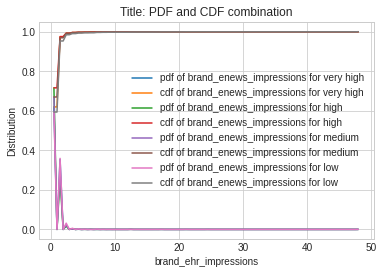

In [ ]:
counts, bin_edges = np.histogram(physician_segment_very_high['brand_enews_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#plt.show();

counts, bin_edges = np.histogram(physician_segment_high['brand_enews_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(physician_segment_medium['brand_enews_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(physician_segment_low['brand_enews_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['pdf of brand_enews_impressions for very high','cdf of brand_enews_impressions for very high',
            'pdf of brand_enews_impressions for high','cdf of brand_enews_impressions for high',
            'pdf of brand_enews_impressions for medium','cdf of brand_enews_impressions for medium',
            'pdf of brand_enews_impressions for low','cdf of brand_enews_impressions for low'])
plt.title('Title: PDF and CDF combination')

plt.xlabel('brand_enews_impressions')
plt.ylabel('Distribution')

plt.show();

Could not infer much from this variable, as all the segments are behaving same

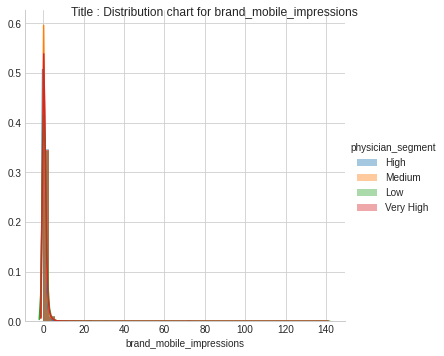

In [ ]:
g = sns.FacetGrid(all_data[['brand_mobile_impressions','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "brand_mobile_impressions") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for brand_mobile_impressions ')
plt.show();

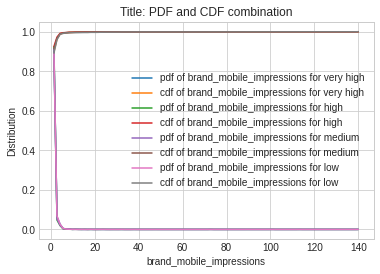

In [ ]:
counts, bin_edges = np.histogram(physician_segment_very_high['brand_mobile_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#plt.show();

counts, bin_edges = np.histogram(physician_segment_high['brand_mobile_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(physician_segment_medium['brand_mobile_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(physician_segment_low['brand_mobile_impressions'], bins=100, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
#compute CDF

cdf = np.cumsum(pdf)
#print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['pdf of brand_mobile_impressions for very high','cdf of brand_mobile_impressions for very high',
            'pdf of brand_mobile_impressions for high','cdf of brand_mobile_impressions for high',
            'pdf of brand_mobile_impressions for medium','cdf of brand_mobile_impressions for medium',
            'pdf of brand_mobile_impressions for low','cdf of brand_mobile_impressions for low'])
plt.title('Title: PDF and CDF combination')

plt.xlabel('brand_mobile_impressions')
plt.ylabel('Distribution')

plt.show();

Could not infer much from this variable, as all the segments are behaving same

# So, Lets plot violin plots also this time.

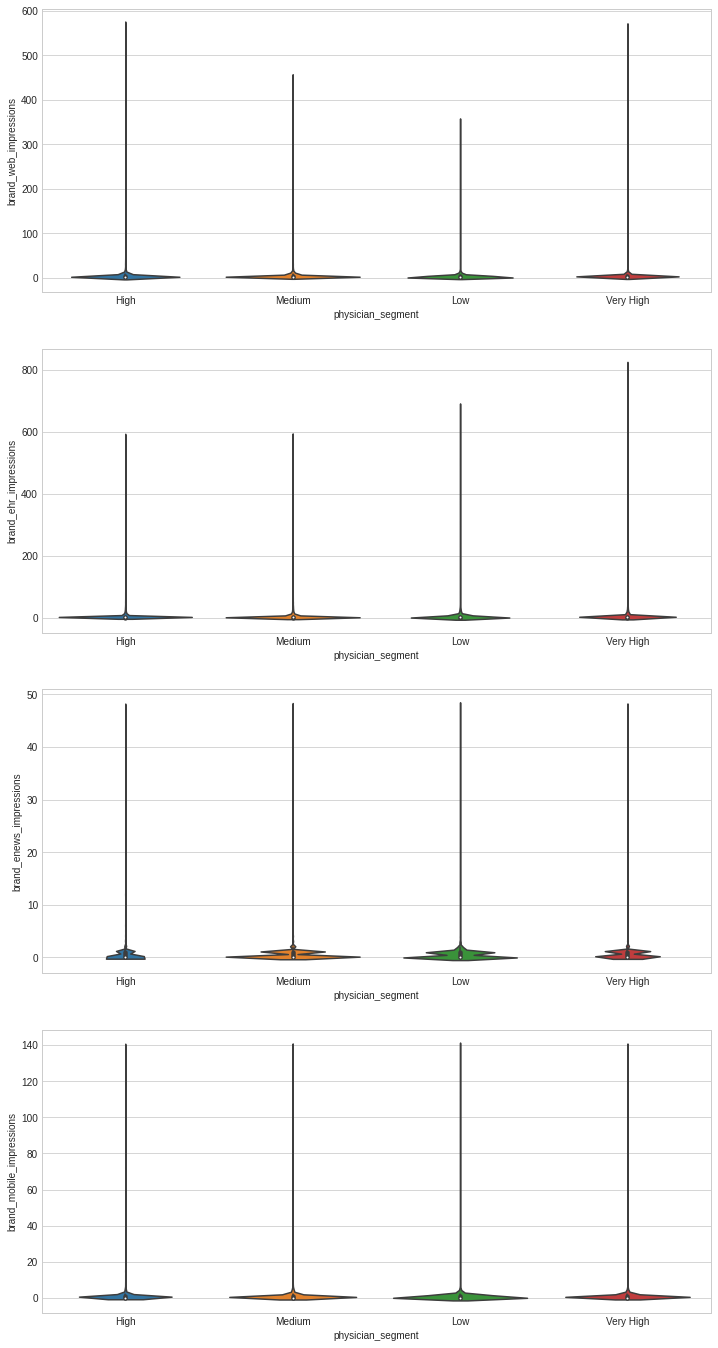

In [ ]:
#fig, axes = plt.subplots(4, 1, figsize=(6, 12))
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

for idx, feature in enumerate(list(['brand_web_impressions','brand_ehr_impressions','brand_enews_impressions','brand_mobile_impressions'])):
  sns.violinplot( x='physician_segment', y=feature, data=all_data, ax=axes[idx])
plt.show()

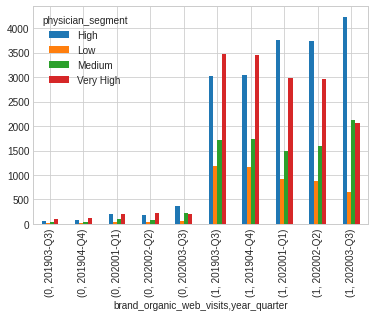

In [ ]:
 grp_by_brand_organic_web_visits = all_data.groupby(['brand_organic_web_visits','year_quarter' ,'physician_segment']).size().unstack()
 grp_by_brand_organic_web_visits.plot(kind = 'bar')

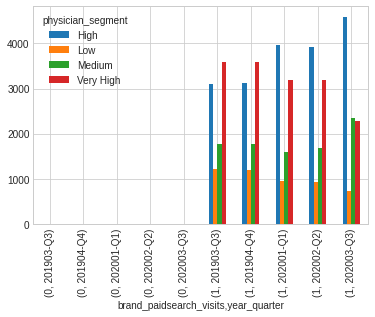

In [ ]:
 grp_by_brandpaid_search_visits = all_data.groupby(['brand_paidsearch_visits','year_quarter' ,'physician_segment']).size().unstack()
 grp_by_brandpaid_search_visits.plot(kind = 'bar')

# Lets again perform all the steps as we saw before

- VIF
- pearson corr coef calculation,
- correlation matrix,
- Percentile check,
- and Boxplots against 90th percentile dataset

In [ ]:
columns_to_analyze = ['brand_web_impressions','brand_ehr_impressions','brand_enews_impressions',
                      'brand_mobile_impressions','brand_organic_web_visits','brand_paidsearch_visits']
df_to_analyze = all_data[columns_to_analyze]
vif_to_analyze = pd.DataFrame()
vif_to_analyze["VIF_FACTOR"] = [variance_inflation_factor(df_to_analyze.iloc[:,:].values, i) for i in range(df_to_analyze.shape[1])]
vif_to_analyze["FEATURES"] = df_to_analyze.columns
vif_to_analyze

VIF_FACTOR                  FEATURES
0  1.121732    brand_web_impressions   
1  1.060122    brand_ehr_impressions   
2  2.603184    brand_enews_impressions 
3  2.349053    brand_mobile_impressions
4  20.195824   brand_organic_web_visits
5  20.242995   brand_paidsearch_visits

It looks like 'brand_organic_web_visits' and 'brand_paidsearch_visits' do have colinearity issue as the value seems to be high

In [ ]:
data_brand_web_impressions = all_data.loc[:,'brand_web_impressions']
data_brand_ehr_impressions = all_data.loc[:,'brand_ehr_impressions']
data_brand_enews_impressions = all_data.loc[:,'brand_enews_impressions']
data_brand_mobile_impressions = all_data.loc[:,'brand_mobile_impressions']
data_brand_organic_web_visits = all_data.loc[:,'brand_organic_web_visits']
data_brand_paidsearch_visits = all_data.loc[:,'brand_paidsearch_visits']


In [ ]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(1)
coef_val, p_val = pearsonr(data_brand_paidsearch_visits,tgt_data)
print('pearsons correlation coefficient: %.3f' % coef_val)
# interpret the significance
alpha_val = 0.05
if p_val > alpha_val:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_val)

pearsons correlation coefficient: 0.005
Samples are uncorrelated (fail to reject H0) p=0.302


In [ ]:
df_feature_set4 = pd.DataFrame(all_data, columns = ['physician_segment_ordinal','brand_web_impressions','brand_ehr_impressions', 
                                                    'brand_enews_impressions', 'brand_mobile_impressions','brand_organic_web_visits',
                                                    'brand_paidsearch_visits'])

<Figure size 864x576 with 0 Axes>

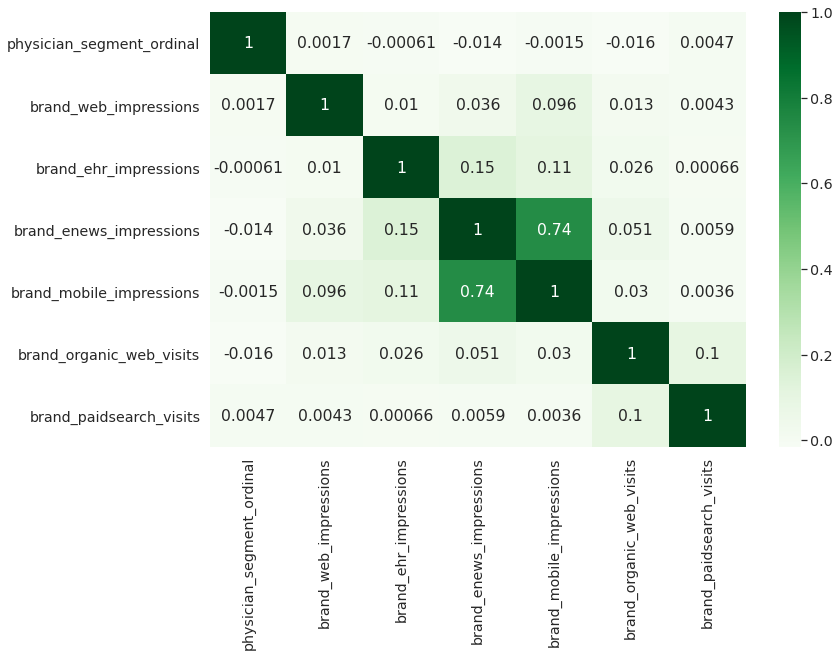

In [ ]:
plt.figure(figsize=(12,8))
df_feature_set4_cor = df_feature_set4.corr()
sns.heatmap(df_feature_set4_cor, annot=True, cmap=plt.cm.Greens)
plt.show() 

- From the pearson correlation coeff calculations, and the above correlation matrix we see that almost all of the fields do not correlate or very less correlation with target variable.

- We also observe that 'brand_enews_impressions','brand_mobile_impressions' are highly colinear, so we can ignore 1 field while modeling

In [ ]:
all_data['log_brand_web_impressions'] = np.log1p(all_data['brand_web_impressions']) 
all_data['log_brand_ehr_impressions'] = np.log1p(all_data['brand_ehr_impressions']) 
all_data['log_brand_enews_impressions'] = np.log1p(all_data['brand_enews_impressions']) 
all_data['log_brand_mobile_impressions'] = np.log1p(all_data['brand_mobile_impressions']) 
all_data['log_brand_organic_web_visits'] = np.log1p(all_data['brand_organic_web_visits']) 
all_data['log_brand_paidsearch_visits'] = np.log1p(all_data['brand_paidsearch_visits']) 

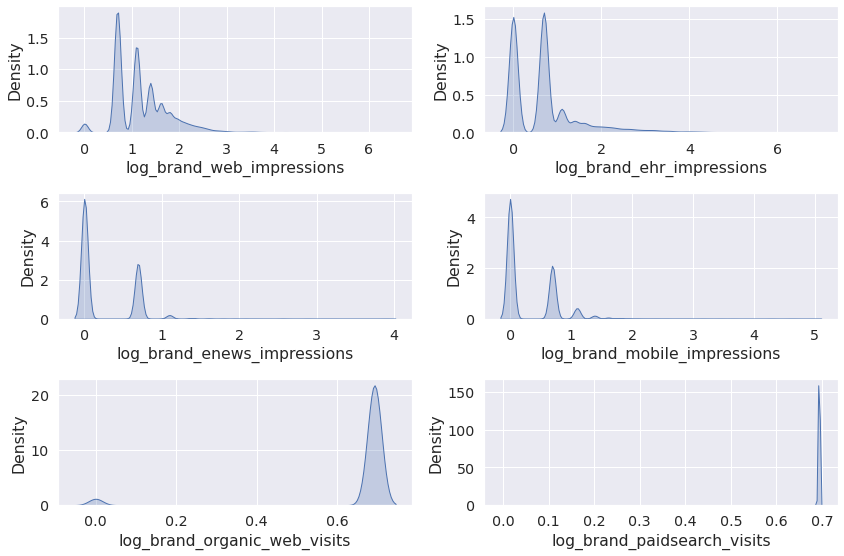

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(['log_brand_web_impressions', 'log_brand_ehr_impressions','log_brand_enews_impressions'
                                                   ,'log_brand_mobile_impressions', 'log_brand_organic_web_visits','log_brand_paidsearch_visits']):
  plot = sns.kdeplot(data=all_data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

In [ ]:
print("25th percentile of brand_web_impressions",np.percentile(all_data[['brand_web_impressions']], 25))
print("50th percentile of brand_web_impressions",np.percentile(all_data[['brand_web_impressions']], 50))
print("75th percentile of brand_web_impressions",np.percentile(all_data[['brand_web_impressions']], 75))
print("90th percentile of brand_web_impressions",np.percentile(all_data[['brand_web_impressions']], 90))
print("95th percentile of brand_web_impressions",np.percentile(all_data[['brand_web_impressions']], 95))
print("100th percentile of brand_web_impressions",np.percentile(all_data[['brand_web_impressions']], 100))

25th percentile of brand_web_impressions 1.0
50th percentile of brand_web_impressions 2.0
75th percentile of brand_web_impressions 4.0
90th percentile of brand_web_impressions 6.0
95th percentile of brand_web_impressions 9.0
100th percentile of brand_web_impressions 572.0


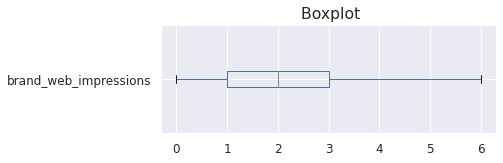

In [ ]:
np90_brand_web_impressions= all_data[all_data['brand_web_impressions']<=6]['brand_web_impressions']
plot = np90_brand_web_impressions.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

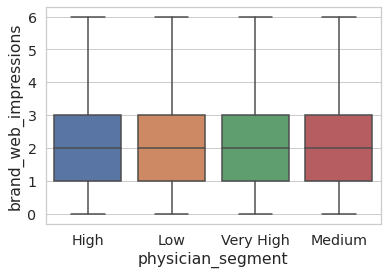

In [ ]:
np90_brand_web_impressions1= all_data[all_data['brand_web_impressions']<=6][['brand_web_impressions','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'brand_web_impressions', data = np90_brand_web_impressions1)

In [ ]:
print("25th percentile of brand_ehr_impressions",np.percentile(all_data[['brand_ehr_impressions']], 25))
print("50th percentile of brand_ehr_impressions",np.percentile(all_data[['brand_ehr_impressions']], 50))
print("75th percentile of brand_ehr_impressions",np.percentile(all_data[['brand_ehr_impressions']], 75))
print("90th percentile of brand_ehr_impressions",np.percentile(all_data[['brand_ehr_impressions']], 90))
print("95th percentile of brand_ehr_impressions",np.percentile(all_data[['brand_ehr_impressions']], 95))
print("100th percentile of brand_ehr_impressions",np.percentile(all_data[['brand_ehr_impressions']], 100))

25th percentile of brand_ehr_impressions 0.0
50th percentile of brand_ehr_impressions 1.0
75th percentile of brand_ehr_impressions 1.0
90th percentile of brand_ehr_impressions 5.0
95th percentile of brand_ehr_impressions 11.0
100th percentile of brand_ehr_impressions 819.0


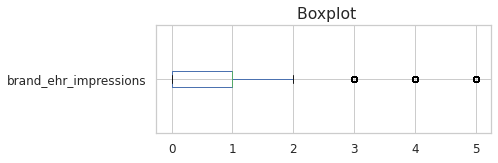

In [ ]:
np90_brand_ehr_impressions= all_data[all_data['brand_ehr_impressions']<=5]['brand_ehr_impressions']
plot = np90_brand_ehr_impressions.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

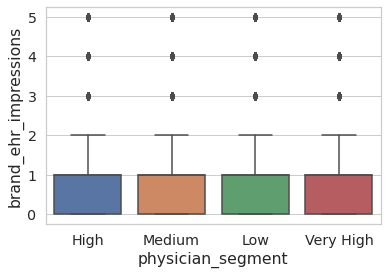

In [ ]:
np90_brand_ehr_impressions1= all_data[all_data['brand_ehr_impressions']<=5][['brand_ehr_impressions','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'brand_ehr_impressions', data = np90_brand_ehr_impressions1)

In [ ]:
print("25th percentile of brand_enews_impressions",np.percentile(all_data[['brand_enews_impressions']], 25))
print("50th percentile of brand_enews_impressions",np.percentile(all_data[['brand_enews_impressions']], 50))
print("75th percentile of brand_enews_impressions",np.percentile(all_data[['brand_enews_impressions']], 75))
print("90th percentile of brand_enews_impressions",np.percentile(all_data[['brand_enews_impressions']], 90))
print("95th percentile of brand_enews_impressions",np.percentile(all_data[['brand_enews_impressions']], 95))
print("100th percentile of brand_enews_impressions",np.percentile(all_data[['brand_enews_impressions']], 100))

25th percentile of brand_enews_impressions 0.0
50th percentile of brand_enews_impressions 0.0
75th percentile of brand_enews_impressions 1.0
90th percentile of brand_enews_impressions 1.0
95th percentile of brand_enews_impressions 1.0
100th percentile of brand_enews_impressions 48.0


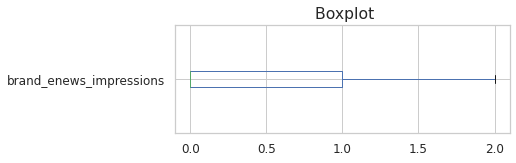

In [ ]:
np90_brand_enews_impressions= all_data[all_data['brand_enews_impressions']<=2]['brand_enews_impressions']
plot = np90_brand_enews_impressions.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

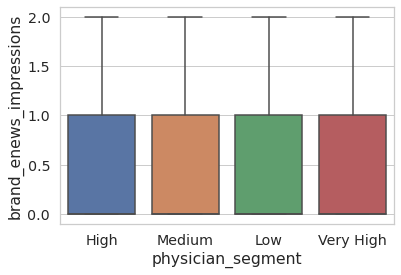

In [ ]:
np90_brand_enews_impressions1= all_data[all_data['brand_enews_impressions']<=2][['brand_enews_impressions','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'brand_enews_impressions', data = np90_brand_enews_impressions1)

In [ ]:
print("25th percentile of brand_mobile_impressions",np.percentile(all_data[['brand_mobile_impressions']], 25))
print("50th percentile of brand_mobile_impressions",np.percentile(all_data[['brand_mobile_impressions']], 50))
print("75th percentile of brand_mobile_impressions",np.percentile(all_data[['brand_mobile_impressions']], 75))
print("90th percentile of brand_mobile_impressions",np.percentile(all_data[['brand_mobile_impressions']], 90))
print("95th percentile of brand_mobile_impressions",np.percentile(all_data[['brand_mobile_impressions']], 95))
print("100th percentile of brand_mobile_impressions",np.percentile(all_data[['brand_mobile_impressions']], 100))

25th percentile of brand_mobile_impressions 0.0
50th percentile of brand_mobile_impressions 0.0
75th percentile of brand_mobile_impressions 1.0
90th percentile of brand_mobile_impressions 1.0
95th percentile of brand_mobile_impressions 2.0
100th percentile of brand_mobile_impressions 140.0


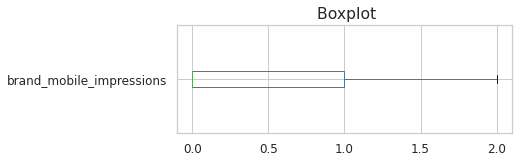

In [ ]:
np90_brand_mobile_impressions= all_data[all_data['brand_mobile_impressions']<=2]['brand_mobile_impressions']
plot = np90_brand_mobile_impressions.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

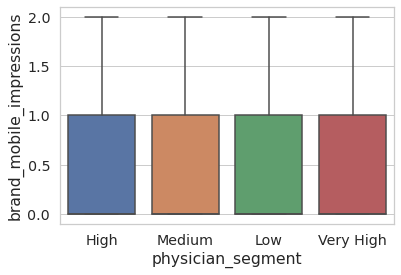

In [ ]:
np90_brand_mobile_impressions1= all_data[all_data['brand_mobile_impressions']<=2][['brand_mobile_impressions','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'brand_mobile_impressions', data = np90_brand_mobile_impressions1)

In [ ]:
print("25th percentile of brand_organic_web_visits",np.percentile(all_data[['brand_organic_web_visits']], 25))
print("50th percentile of brand_organic_web_visits",np.percentile(all_data[['brand_organic_web_visits']], 50))
print("75th percentile of brand_organic_web_visits",np.percentile(all_data[['brand_organic_web_visits']], 75))
print("90th percentile of brand_organic_web_visits",np.percentile(all_data[['brand_organic_web_visits']], 90))
print("95th percentile of brand_organic_web_visits",np.percentile(all_data[['brand_organic_web_visits']], 95))
print("100th percentile of brand_organic_web_visits",np.percentile(all_data[['brand_organic_web_visits']], 100))

25th percentile of brand_organic_web_visits 1.0
50th percentile of brand_organic_web_visits 1.0
75th percentile of brand_organic_web_visits 1.0
90th percentile of brand_organic_web_visits 1.0
95th percentile of brand_organic_web_visits 1.0
100th percentile of brand_organic_web_visits 1.0


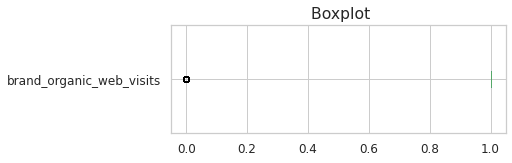

In [ ]:
np90_brand_organic_web_visits= all_data[all_data['brand_organic_web_visits']<=1]['brand_organic_web_visits']
plot = np90_brand_organic_web_visits.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

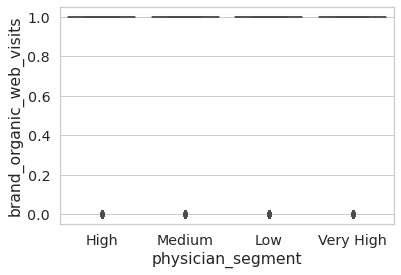

In [ ]:
np90_brand_organic_web_visits1= all_data[all_data['brand_organic_web_visits']<=1][['brand_organic_web_visits','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'brand_organic_web_visits', data = np90_brand_organic_web_visits1)

In [ ]:
print("25th percentile of brand_paidsearch_visits",np.percentile(all_data[['brand_paidsearch_visits']], 25))
print("50th percentile of brand_paidsearch_visits",np.percentile(all_data[['brand_paidsearch_visits']], 50))
print("75th percentile of brand_paidsearch_visits",np.percentile(all_data[['brand_paidsearch_visits']], 75))
print("90th percentile of brand_paidsearch_visits",np.percentile(all_data[['brand_paidsearch_visits']], 90))
print("95th percentile of brand_paidsearch_visits",np.percentile(all_data[['brand_paidsearch_visits']], 95))
print("100th percentile of brand_paidsearch_visits",np.percentile(all_data[['brand_paidsearch_visits']], 100))

25th percentile of brand_paidsearch_visits 1.0
50th percentile of brand_paidsearch_visits 1.0
75th percentile of brand_paidsearch_visits 1.0
90th percentile of brand_paidsearch_visits 1.0
95th percentile of brand_paidsearch_visits 1.0
100th percentile of brand_paidsearch_visits 1.0


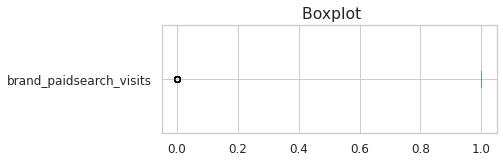

In [ ]:
np90_brand_paidsearch_visits= all_data[all_data['brand_paidsearch_visits']<=2]['brand_paidsearch_visits']
plot = np90_brand_paidsearch_visits.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

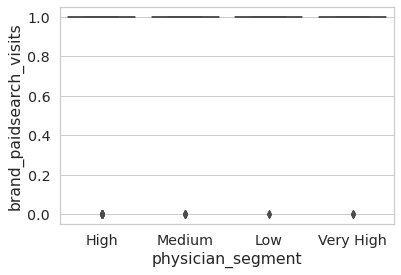

In [ ]:
np90_brand_paidsearch_visits1= all_data[all_data['brand_paidsearch_visits']<=2][['brand_paidsearch_visits','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'brand_paidsearch_visits', data = np90_brand_paidsearch_visits1)	

# So Let's Try to answer few more Hypothesis Questions

**Q. Does brand_web_impressions impact on the physician segment?**

- Tried plotting Distribution plot and could not derive much insights, then tried PDF and CDF and almost all the segments behave the same. 

- Have even plotted Violin plots as well. 

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_ehr_impressions impact on the physician segment?**

- Tried plotting Distribution plot and could not derive much insights, then tried PDF and CDF and almost all the segments behave the same. 

- Have even plotted Violin plots as well. could not derive much insights.

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_enews_impressions impact on the physician segment?**

- Tried plotting Distribution plot and could not derive much insights, then tried PDF and CDF and almost all the segments behave the same. 

- Have even plotted Violin plots as well. could not derive much insights.

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_mobile_impressions impact on the physician segment?**

- Tried plotting Distribution plot and could not derive much insights, then tried PDF and CDF and almost all the segments behave the same. 

- Have even plotted Violin plots as well. Additionally there are very few records with more than 5 brand_mobile_impressions.

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_organic_web_visits impact on the physician segment?**

- Almost all records belong to brand_organic_web_visits, there are no records without brand_organic_web_visits

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_paidsearch_visits impact on the physician segment?**

- Almost all records belong to brand_paidsearch_visits, there are no records without brand_paidsearch_visits.

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

# 6. Lets take **competitor prescriptions** related search columns columns and perform its analysis with class label

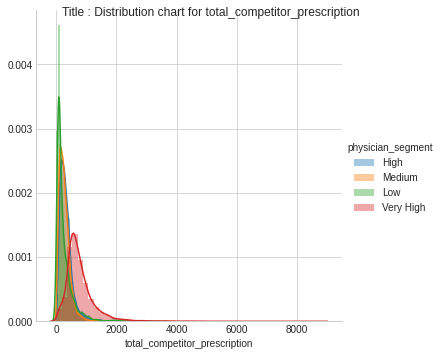

In [ ]:
g = sns.FacetGrid(all_data[['total_competitor_prescription','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_competitor_prescription") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for total_competitor_prescription ')
plt.show();

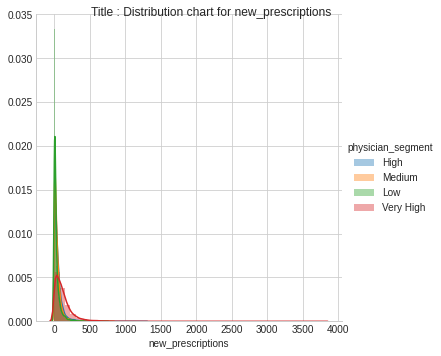

In [ ]:
g = sns.FacetGrid(all_data[['new_prescriptions','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "new_prescriptions") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for new_prescriptions ')
plt.show();

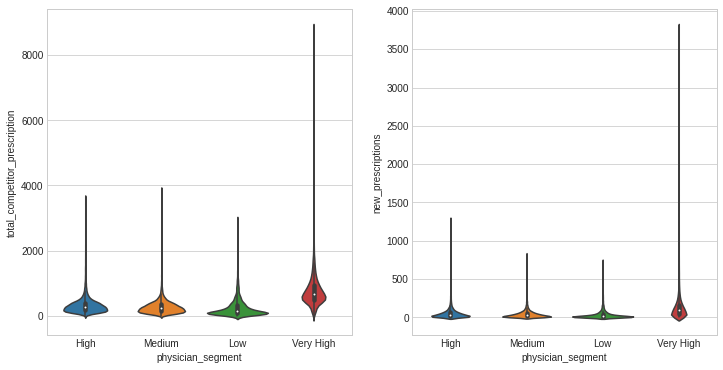

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for idx, feature in enumerate(list(['total_competitor_prescription','new_prescriptions'])):
    sns.violinplot( x='physician_segment', y=feature, data=all_data, ax=axes[idx])
plt.show()

# Lets again perform all the steps as we saw before

- VIF
- pearson corr coef calculation,
- correlation matrix,
- Percentile check,
- and Boxplots against 90th percentile dataset

In [ ]:
columns_to_analyze = ['total_competitor_prescription','new_prescriptions']
df_to_analyze = all_data[columns_to_analyze]
vif_to_analyze = pd.DataFrame()
vif_to_analyze["VIF_FACTOR"] = [variance_inflation_factor(df_to_analyze.iloc[:,:].values, i) for i in range(df_to_analyze.shape[1])]
vif_to_analyze["FEATURES"] = df_to_analyze.columns
vif_to_analyze

VIF_FACTOR                       FEATURES
0  2.944232    total_competitor_prescription
1  2.944232    new_prescriptions

In [ ]:
data_total_competitor_prescription = all_data.loc[:,'total_competitor_prescription']
data_new_prescriptions = all_data.loc[:,'new_prescriptions']

In [ ]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(1)
coef_val, p_val = pearsonr(data_new_prescriptions,tgt_data)
print('pearsons correlation coefficient: %.3f' % coef_val)
# interpret the significance
alpha_val = 0.05
if p_val > alpha_val:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_val)

pearsons correlation coefficient: 0.312
Samples are correlated (reject H0) p=0.000


In [ ]:
df_feature_set5 = pd.DataFrame(all_data, columns = ['physician_segment_ordinal','total_competitor_prescription','new_prescriptions'])

<Figure size 576x432 with 0 Axes>

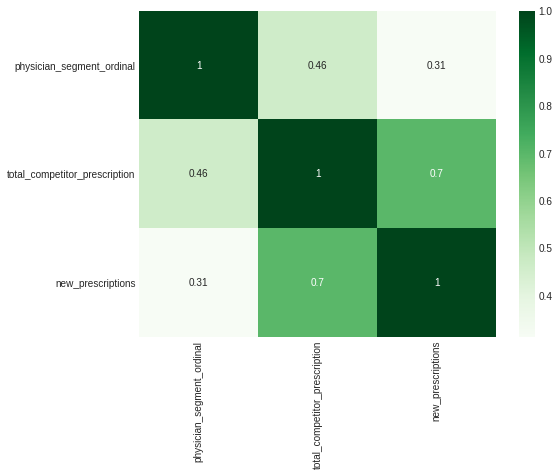

In [ ]:
plt.figure(figsize=(8,6))
df_feature_set5_cor = df_feature_set5.corr()
sns.heatmap(df_feature_set5_cor, annot=True, cmap=plt.cm.Greens)
plt.show()  

In [ ]:
all_data['log_total_competitor_prescription'] = np.log1p(all_data['total_competitor_prescription']) 
all_data['log_new_prescriptions'] = np.log1p(all_data['new_prescriptions']) 

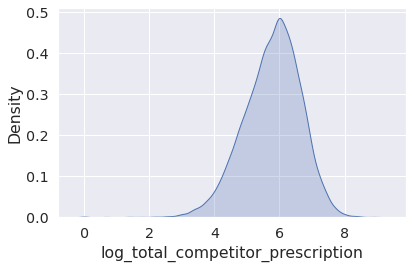

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_total_competitor_prescription', fill=True)
plt.tight_layout()

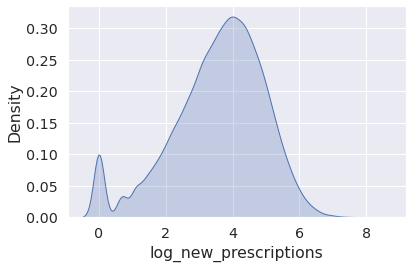

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_new_prescriptions', fill=True)
plt.tight_layout()

KDE PLOT DISTRIBUTION WITH RESPECT TO TARGET LABEL

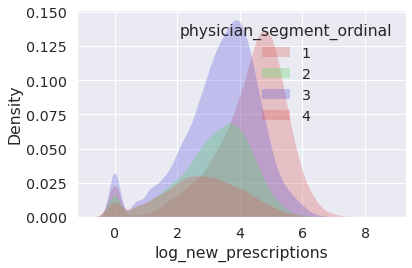

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_new_prescriptions',hue="physician_segment_ordinal",alpha=.3, linewidth=0,palette="hls", fill=True)
plt.tight_layout()

In [ ]:
print("25th percentile of total_competitor_prescription",np.percentile(all_data[['total_competitor_prescription']], 25))
print("50th percentile of total_competitor_prescription",np.percentile(all_data[['total_competitor_prescription']], 50))
print("75th percentile of total_competitor_prescription",np.percentile(all_data[['total_competitor_prescription']], 75))
print("90th percentile of total_competitor_prescription",np.percentile(all_data[['total_competitor_prescription']], 90))
print("95th percentile of total_competitor_prescription",np.percentile(all_data[['total_competitor_prescription']], 95))
print("100th percentile of total_competitor_prescription",np.percentile(all_data[['total_competitor_prescription']], 100))

25th percentile of total_competitor_prescription 182.0
50th percentile of total_competitor_prescription 344.0
75th percentile of total_competitor_prescription 587.0
90th percentile of total_competitor_prescription 916.0
95th percentile of total_competitor_prescription 1188.9000000000015
100th percentile of total_competitor_prescription 8815.0


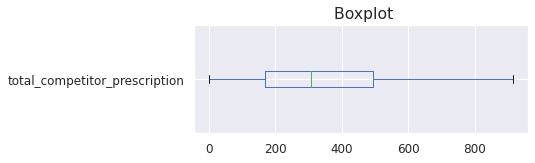

In [ ]:
np90_total_competitor_prescription= all_data[all_data['total_competitor_prescription']<=916]['total_competitor_prescription']
plot = np90_total_competitor_prescription.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

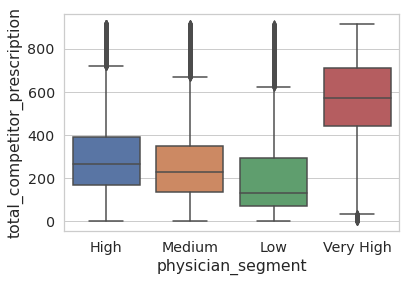

In [ ]:
np90_total_competitor_prescription1= all_data[all_data['total_competitor_prescription']<=916][['total_competitor_prescription','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'total_competitor_prescription', data = np90_total_competitor_prescription1)	

In [ ]:
print("25th percentile of new_prescriptions",np.percentile(all_data[['new_prescriptions']], 25))
print("50th percentile of new_prescriptions",np.percentile(all_data[['new_prescriptions']], 50))
print("75th percentile of new_prescriptions",np.percentile(all_data[['new_prescriptions']], 75))
print("90th percentile of new_prescriptions",np.percentile(all_data[['new_prescriptions']], 90))
print("95th percentile of new_prescriptions",np.percentile(all_data[['new_prescriptions']], 95))
print("100th percentile of new_prescriptions",np.percentile(all_data[['new_prescriptions']], 100))

25th percentile of new_prescriptions 15.0
50th percentile of new_prescriptions 41.0
75th percentile of new_prescriptions 92.0
90th percentile of new_prescriptions 174.0
95th percentile of new_prescriptions 249.0
100th percentile of new_prescriptions 3790.0


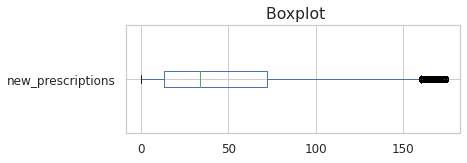

In [ ]:
np90_new_prescriptions= all_data[all_data['new_prescriptions']<=174]['new_prescriptions']
plot = np90_new_prescriptions.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

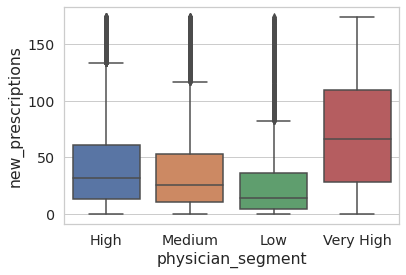

In [ ]:
np90_new_prescriptions1= all_data[all_data['new_prescriptions']<=174][['new_prescriptions','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'new_prescriptions', data = np90_new_prescriptions1)	

# So Let's Try to answer few more Hypothesis Questions

**Q. Does total_competitor_prescription impact on the physician segment?**

- Plotted the distribution Chart, and Violin plots, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much.

- good correlation with the target label

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High'. we see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

**Q. Does new_prescriptions impact on the physician segment?**

- Plotted the distribution Chart, and Violin plots, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much.

- good correlation with the target label

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High'. we see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling. 


# 7. Lets take **Locality** related search columns and perform its analysis with class label

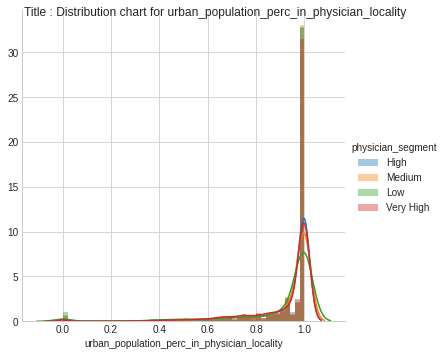

In [ ]:
g = sns.FacetGrid(all_data[['urban_population_perc_in_physician_locality','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "urban_population_perc_in_physician_locality") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for urban_population_perc_in_physician_locality ')
plt.show();

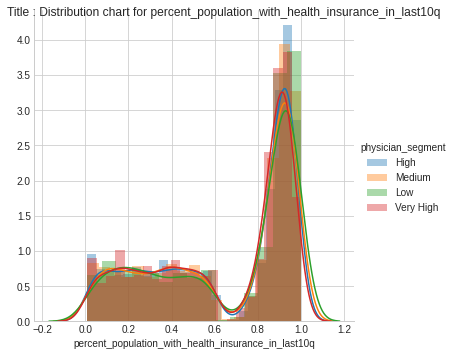

In [ ]:
g = sns.FacetGrid(all_data[['percent_population_with_health_insurance_in_last10q','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "percent_population_with_health_insurance_in_last10q") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for percent_population_with_health_insurance_in_last10q ')
plt.show();

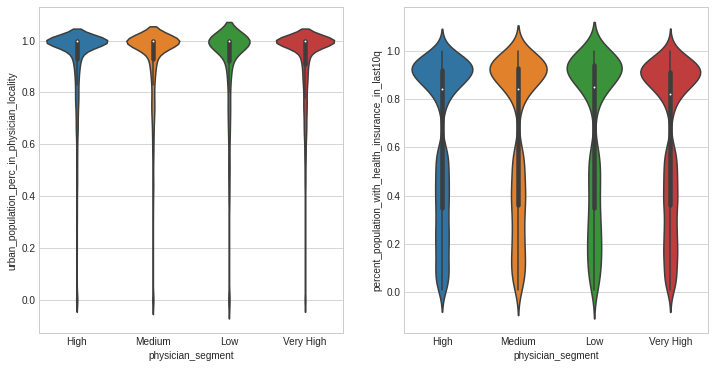

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for idx, feature in enumerate(list(['urban_population_perc_in_physician_locality','percent_population_with_health_insurance_in_last10q'])):
    sns.violinplot( x='physician_segment', y=feature, data=all_data, ax=axes[idx])
plt.show()

In [ ]:
df_feature_set6 = pd.DataFrame(all_data, columns = ['physician_segment_ordinal','urban_population_perc_in_physician_locality', 
                                                    'percent_population_with_health_insurance_in_last10q'])

<Figure size 576x432 with 0 Axes>

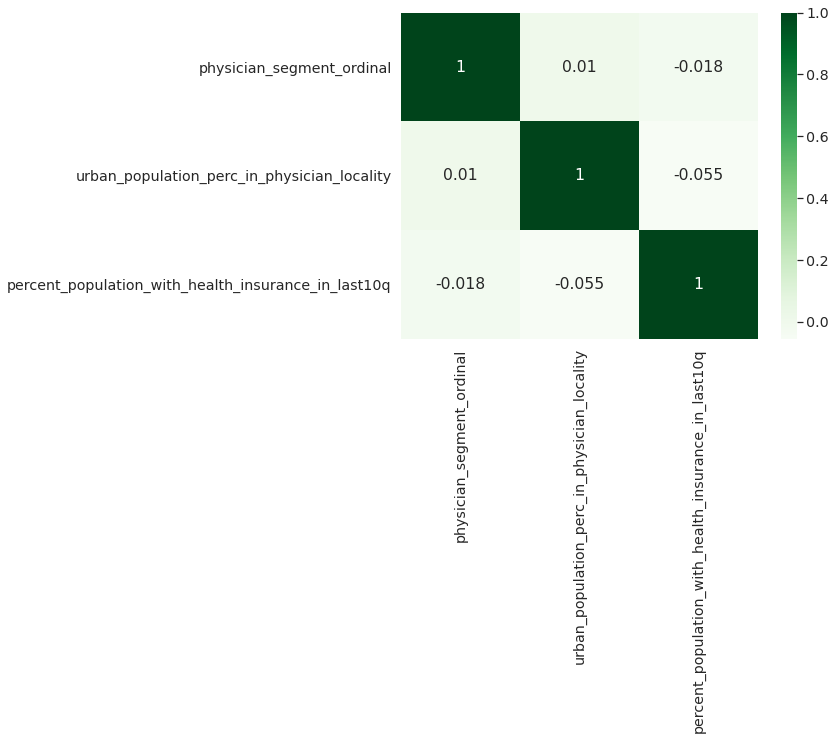

In [ ]:
plt.figure(figsize=(8,6))
df_feature_set6_cor = df_feature_set6.corr()
sns.heatmap(df_feature_set6_cor, annot=True, cmap=plt.cm.Greens)
plt.show() 

In [ ]:
all_data['log_urban_population_perc_in_physician_locality'] = np.log1p(all_data['urban_population_perc_in_physician_locality']) 
all_data['log_percent_population_with_health_insurance_in_last10q'] = np.log1p(all_data['percent_population_with_health_insurance_in_last10q']) 

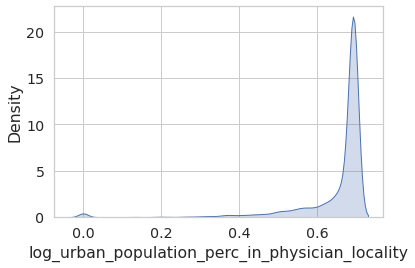

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_urban_population_perc_in_physician_locality', fill=True)
plt.tight_layout()

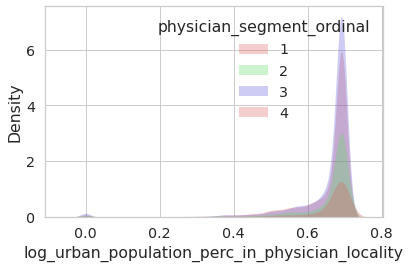

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_urban_population_perc_in_physician_locality',hue="physician_segment_ordinal",alpha=.3, linewidth=0,palette="hls", fill=True)
plt.tight_layout()

# So Let's Try to answer few more Hypothesis Questions

**Q. Does urban_population_perc_in_physician_locality impact on the physician segment?**

A. It does not really matter as all the segments behave the same. Most of the population lies in urban areas

**Q. Does percent_population_with_health_insurance_in_last10q impact on the physician segment?**

A. It does not really matter as all the segments behave the same. 

Morever we have seen the Correlation matrix as well, which does not provide any insight 

# 8. Lets take **physician age and tenure** related search columns and perform its analysis with class label

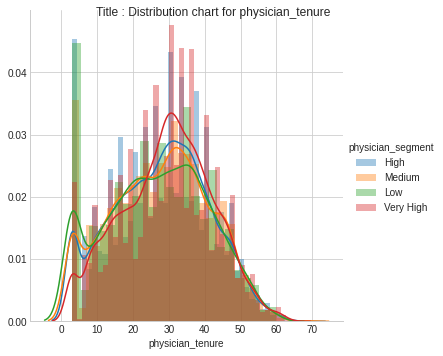

In [ ]:
g = sns.FacetGrid(all_data[['physician_tenure','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "physician_tenure") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for physician_tenure ')
plt.show();

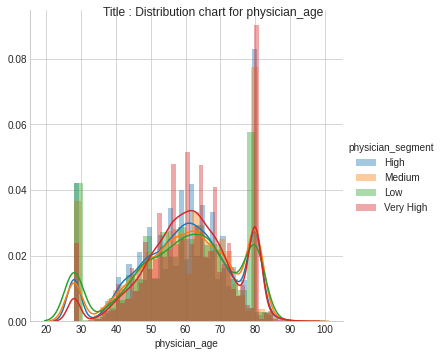

In [ ]:
g = sns.FacetGrid(all_data[['physician_age','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "physician_age") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for physician_age ')
plt.show();

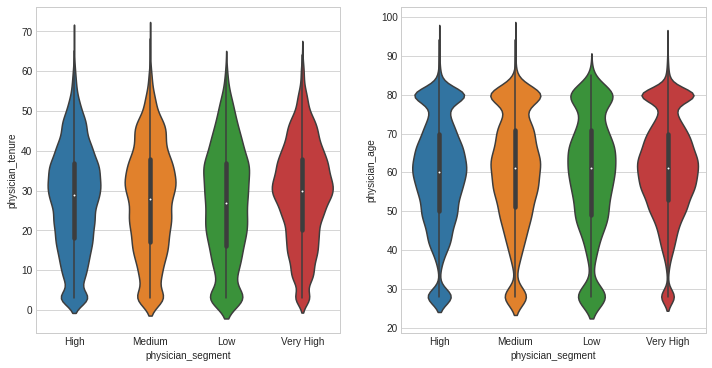

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for idx, feature in enumerate(list(['physician_tenure','physician_age'])):
    sns.violinplot( x='physician_segment', y=feature, data=all_data, ax=axes[idx])
plt.show()

In [ ]:
columns_to_analyze = ['physician_tenure','physician_age']
df_to_analyze = all_data[columns_to_analyze]
vif_to_analyze = pd.DataFrame()
vif_to_analyze["VIF_FACTOR"] = [variance_inflation_factor(df_to_analyze.iloc[:,:].values, i) for i in range(df_to_analyze.shape[1])]
vif_to_analyze["FEATURES"] = df_to_analyze.columns
vif_to_analyze

VIF_FACTOR          FEATURES
0  7.9266      physician_tenure
1  7.9266      physician_age

In [ ]:
data_physician_tenure = all_data.loc[:,'physician_tenure']
data_physician_age = all_data.loc[:,'physician_age']

In [ ]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(1)
coef_val, p_val = pearsonr(data_physician_age,tgt_data)
print('pearsons correlation coefficient: %.3f' % coef_val)
# interpret the significance
alpha_val = 0.05
if p_val > alpha_val:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_val)

pearsons correlation coefficient: 0.046
Samples are correlated (reject H0) p=0.000


In [ ]:
df_feature_set7 = pd.DataFrame(all_data, columns = ['physician_segment_ordinal','physician_tenure','physician_age'])

<Figure size 576x432 with 0 Axes>

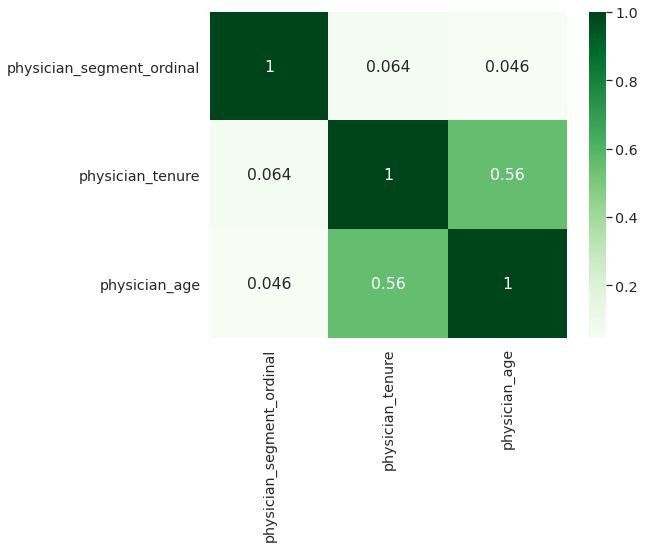

In [ ]:
plt.figure(figsize=(8,6))
df_feature_set7_cor = df_feature_set7.corr()
sns.heatmap(df_feature_set7_cor, annot=True, cmap=plt.cm.Greens)
plt.show()  

In [ ]:
all_data['log_physician_tenure'] = np.log1p(all_data['physician_tenure']) 
all_data['log_physician_age'] = np.log1p(all_data['physician_age']) 

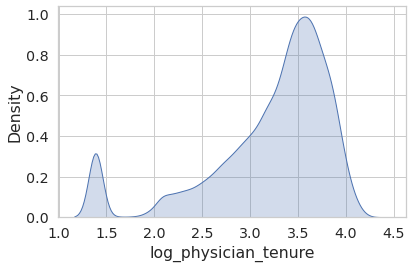

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_physician_tenure', fill=True)
plt.tight_layout()

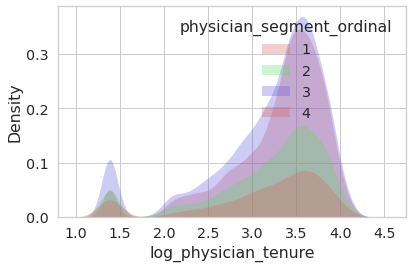

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_physician_tenure',hue="physician_segment_ordinal",alpha=.3, linewidth=0,palette="hls", fill=True)
plt.tight_layout()

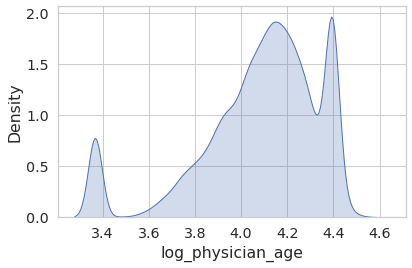

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_physician_age', fill=True)
plt.tight_layout()

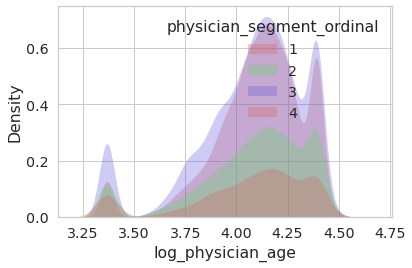

In [ ]:
plot = sns.kdeplot(data=all_data, x='log_physician_age',hue="physician_segment_ordinal",alpha=.3, linewidth=0,palette="hls", fill=True)
plt.tight_layout()

In [ ]:
print("25th percentile of physician_tenure",np.percentile(all_data[['physician_tenure']], 25))
print("50th percentile of physician_tenure",np.percentile(all_data[['physician_tenure']], 50))
print("75th percentile of physician_tenure",np.percentile(all_data[['physician_tenure']], 75))
print("90th percentile of physician_tenure",np.percentile(all_data[['physician_tenure']], 90))
print("95th percentile of physician_tenure",np.percentile(all_data[['physician_tenure']], 95))
print("100th percentile of physician_tenure",np.percentile(all_data[['physician_tenure']], 100))

25th percentile of physician_tenure 18.0
50th percentile of physician_tenure 29.0
75th percentile of physician_tenure 38.0
90th percentile of physician_tenure 45.0
95th percentile of physician_tenure 49.0
100th percentile of physician_tenure 68.0


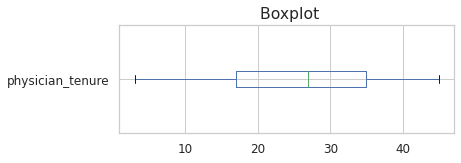

In [ ]:
np90_physician_tenure= all_data[all_data['physician_tenure']<=45]['physician_tenure']
plot = np90_physician_tenure.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

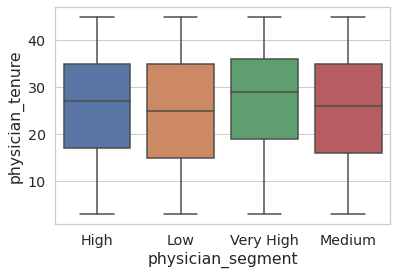

In [ ]:
np90_physician_tenure1= all_data[all_data['physician_tenure']<=45][['physician_tenure','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'physician_tenure', data = np90_physician_tenure1)

In [ ]:
print("25th percentile of physician_age",np.percentile(all_data[['physician_age']], 25))
print("50th percentile of physician_age",np.percentile(all_data[['physician_age']], 50))
print("75th percentile of physician_age",np.percentile(all_data[['physician_age']], 75))
print("90th percentile of physician_age",np.percentile(all_data[['physician_age']], 90))
print("95th percentile of physician_age",np.percentile(all_data[['physician_age']], 95))
print("100th percentile of physician_age",np.percentile(all_data[['physician_age']], 100))

25th percentile of physician_age 51.0
50th percentile of physician_age 61.0
75th percentile of physician_age 70.0
90th percentile of physician_age 80.0
95th percentile of physician_age 80.0
100th percentile of physician_age 94.0


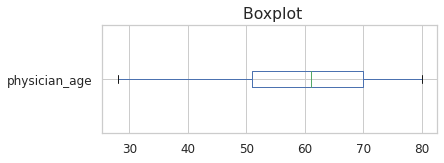

In [ ]:
np90_physician_age= all_data[all_data['physician_age']<=80]['physician_age']
plot = np90_physician_age.plot(kind = 'box', vert=False, figsize=(6, 2), title = ' Boxplot', fontsize=12)

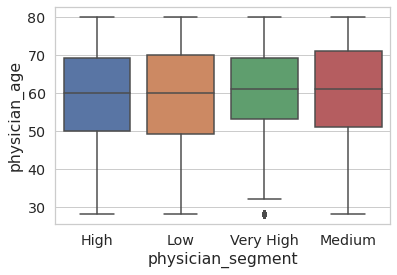

In [ ]:
np90_physician_age1= all_data[all_data['physician_age']<=80][['physician_age','physician_segment']]
sns.set_style("whitegrid")  
sns.boxplot(x = 'physician_segment', y = 'physician_age', data = np90_physician_age1)

# So Let's Try to answer few more Hypothesis Questions

**Q. Does physician_tenure impact on the physician segment?**

- It looks like for 'Very High' segment, the physician tenure is slightly more than other segments.

- Correlation matrix also shows the same

**Q. Does physician_age impact on the physician segment?**

- It looks like for 'Very High' segment, the physician age is slightly more than other segments.

- Correlation matrix also shows the same

# Correlation HeatMaps (for All impacting variables v/s Target Label)

In [ ]:
df_feature_set_final = pd.DataFrame(all_data, columns = ['brand_prescribed','total_representative_visits','total_sample_dropped',
                          'physician_hospital_affiliation','physician_in_group_practice',
                          'total_prescriptions_for_indication1','total_prescriptions_for_indication2',
                          'total_patient_with_commercial_insurance_plan','total_patient_with_medicare_insurance_plan','total_patient_with_medicaid_insurance_plan',
                          'total_competitor_prescription','new_prescriptions','physician_segment_ordinal'])

<Figure size 1080x864 with 0 Axes>

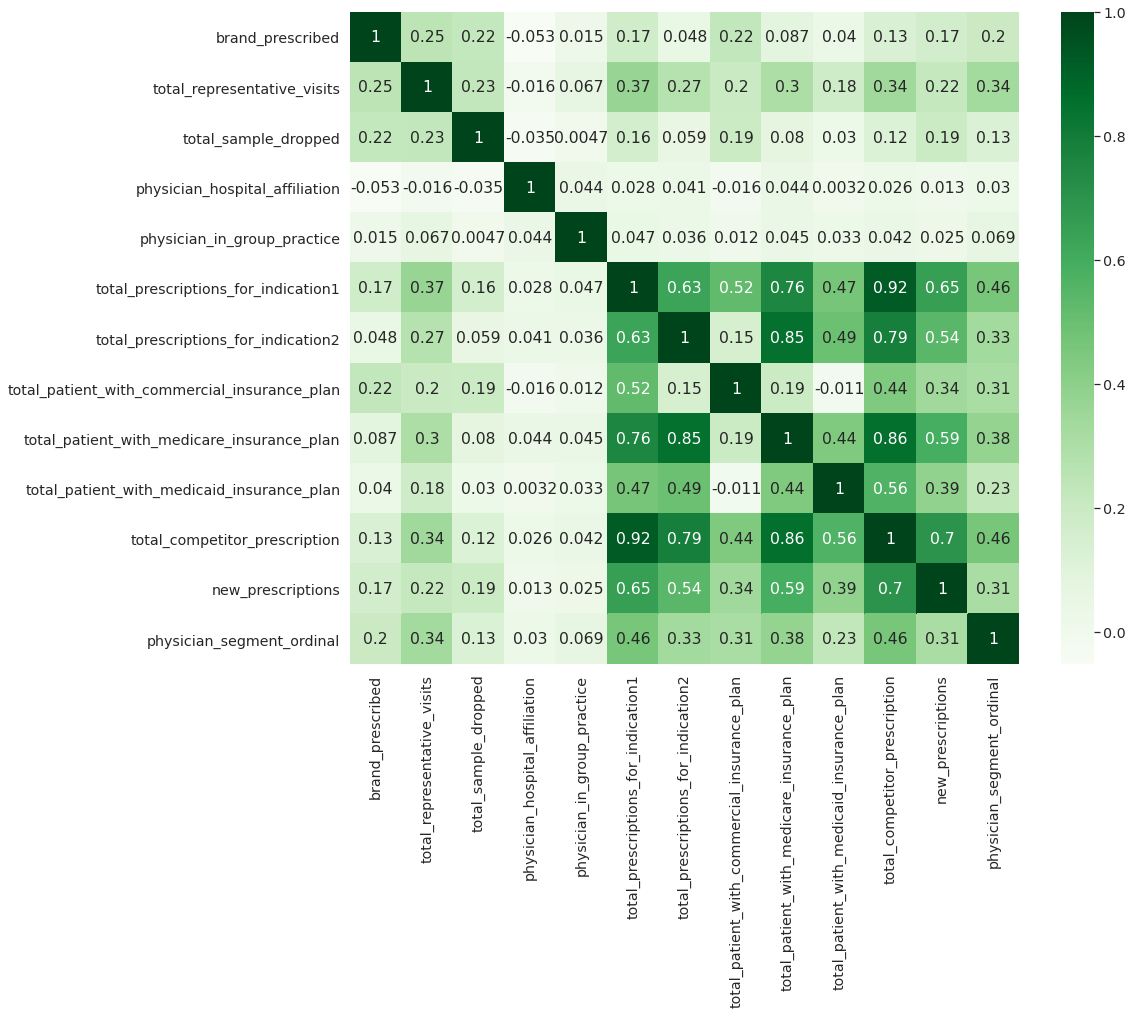

In [ ]:
plt.figure(figsize=(15,12))
df_feature_set_final_cor = df_feature_set_final.corr()
sns.heatmap(df_feature_set_final_cor, annot=True, cmap=plt.cm.Greens)
plt.show()     

# **FINAL EDA CONCLUSIONS:**

***1. FROM CATEGORICAL VARIABLES EDA*** 

Below are the variables which impact

**Q. Does gender impact on the physician segment?**

A. Yes, as you can see Very High and High Category percentage is more for Male population, than Female. For Female population we see that Medium and Low constitute more percentage

**Q. Does physician speciality impact on the physician segment?**

A. Yes the physician with speciality in nephrology tend to prescribe more than the urology and others category

***2. FROM NUMERICAL VARIABLES EDA***

Below are the variables which impact

**Q. Does brand_prescribed impact on the physician segment?**

A. Yes, if brand is prescribed the previous quarters, it is more likely that physician will prescribe it in next quarter.

**Q. Does total_representative_visits impact on the physician segment?**

A. Yes, from the distribution chart we see that if the no of representative visits are high, then there is maximum chance that the physician will prescribe the medicine.

**Q. Does total_sample_dropped impact on the physician segment?**

A. Yes, it certainly impacts as we are seeing maximum distribution for the 2 segments (Very High and High Categories)

**Q. Does physician_hospital_affiliation impact on the physician segment?**

A. Yes, it looks like lot of physicians do not have hospital affiliations and are more likely to prescribe the medicines.

**Q. Does physician_in_group_practice impact on the physician segment?**

A. Yes, from the distribution chart we see that if the physician is in group setup then he is more likely to prescribe the medicine.

**Q. Does total_prescriptions_for_indication1, total_prescriptions_for_indication2, total_prescriptions_for_indication3 impact on the physician segment?**

A. For total_prescriptions_for_indication1, and total_prescriptions_for_indication3 definitely have greater distribution for the segment 'Very High' and 'High', and lesser distribution for 'Low' and 'Medium'. For total_prescriptions_for_indication2 we do not see any proper distribution to infer

**Q. Does total_patient_with_commercial_insurance_plan impact on the physician segment?**

A. Yes, certainly we see fatter distributions for 'High' and 'Very High' category

**Q. Does total_patient_with_medicare_insurance_plan impact on the physician segment?**

A. Yes, certainly we see fatter distributions for 'Very High' category

**Q. Does total_patient_with_medicaid_insurance_plan impact on the physician segment?**

A. We have checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High' and for remaining categories it is almost same

**Q. Does brand search and web search related columns impact on the physician segment?**

A. There are about 6 variables, and have tried checking PDF, CDF, box plots, percentiles etc. As we could not find any pattern, cannot make any inference.

**Q. Does total_competitor_prescription impact on the physician segment?**

A. Plotted the distribution Chart, and Violin plots, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much.

**Q. Does new_prescriptions impact on the physician segment?**

A. Plotted the distribution Chart, and Violin plots, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much. we also see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

**Q. Does locality related columns impact on the physician segment?**

A. Could not find out proper pattern, so cannot make any inference.

**Q. Does physician age and tenure related columns impact on the physician segment?**

A. Could not find out proper pattern, so cannot make any inference. Except for the fact that the 'Very High' segment had slightly more tenure and more age for a physician.




# So, out of Total 31 variables, we see that 2 categorical variables, and 12 Numerical Variables look more important than other variables

In [ ]:
#all_data.drop(['physician_id'], axis = 1,inplace = True)
all_data.drop(['physician_segment'], axis = 1,inplace = True)

In [ ]:
all_data.to_csv('/content/Drug_Marketing/Drug_Marketing/all_data_new.csv',index=False)

In [ ]:
all_data_new=pd.read_csv('/content/Drug_Marketing/Drug_Marketing/all_data_new.csv')
#print (all_data_new.head())

In [ ]:
all_data_new.head(5)

year_quarter  ...  physician_segment_ordinal
0  201903-Q3    ...  3                        
1  201904-Q4    ...  3                        
2  202001-Q1    ...  3                        
3  202002-Q2    ...  3                        
4  202003-Q3    ...  2                        

[5 rows x 31 columns]

# PERFORMING PCA and T-SNE using MinMaxScaler AND VISUALIZING TO CHECK IF WE ARE ABLE TO DISTINGUISH BETWEEN MULTIPLE CLASSES

In [ ]:
all_data_new_class = all_data_new['physician_segment_ordinal'].values
all_data_new = all_data_new.drop(['physician_segment_ordinal'], axis=1)

In [ ]:
category_cols

['physician_gender', 'physician_speciality', 'year_quarter']

In [ ]:
numerical_cols

['brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'saving_cards_dropped',
 'vouchers_dropped',
 'total_seminar_as_attendee',
 'total_seminar_as_speaker',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_prescriptions_for_indication3',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'brand_web_impressions',
 'brand_ehr_impressions',
 'brand_enews_impressions',
 'brand_mobile_impressions',
 'brand_organic_web_visits',
 'brand_paidsearch_visits',
 'total_competitor_prescription',
 'new_prescriptions',
 'urban_population_perc_in_physician_locality',
 'percent_population_with_health_insurance_in_last10q',
 'physician_tenure',
 'physician_age']

In [ ]:
all_data_new = pd.get_dummies(all_data_new, columns = category_cols)

In [ ]:
features = numerical_cols
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
all_data_new[features] = autoscaler.fit_transform(all_data_new[features])

In [ ]:
all_data_new.head(5)

brand_prescribed  ...  year_quarter_202003-Q3
0  1.0               ...  0                     
1  1.0               ...  0                     
2  1.0               ...  0                     
3  1.0               ...  0                     
4  1.0               ...  1                     

[5 rows x 37 columns]

In [ ]:
#reference : Applied AI Course 
from sklearn import decomposition
pca = decomposition.PCA()


In [ ]:
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(all_data_new)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (48703, 2)


In [ ]:
all_data_new_class = all_data_new_class.reshape(-1,1)

In [ ]:
print("shape of all_data_new_class.shape = ", all_data_new_class.shape)

shape of all_data_new_class.shape =  (48703, 1)


In [ ]:
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (48703, 2)


In [ ]:
all_data_new_class_T=all_data_new_class.T
print('all_data_new_class_T.shape',all_data_new_class_T.shape)

all_data_new_class_T.shape (1, 48703)


In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, all_data_new_class_T)).T

In [ ]:
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (48703, 3)


In [ ]:
pca_data[0]

array([-0.6663144 , -0.36273485,  3.        ])

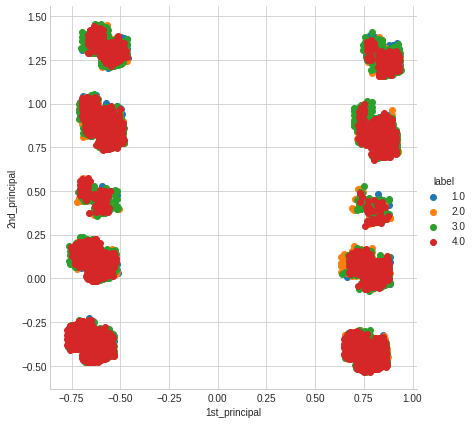

In [ ]:
# attaching the label for each 2-d data point 
#pca_data = np.vstack((pca_data.T, all_data_new_class_T)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

<Figure size 432x288 with 0 Axes>

(-1.5, 31.5, 0.17175796455062572, 1.0394400969261608)

Text(0.5, 0, 'n_components')

Text(0, 0.5, 'Cumulative_explained_variance')

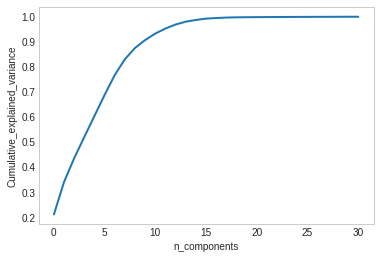

In [ ]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 31
pca_data = pca.fit_transform(all_data_new)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

for TSNE

In [ ]:
# TSNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(all_data_new)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, all_data_new_class_T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))



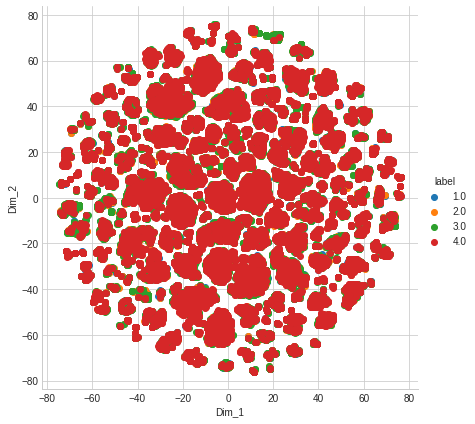

In [ ]:
# Ploting the result of tsne
g= sns.FacetGrid(tsne_df, hue="label", size=6)
g.map(plt.scatter, 'Dim_1', 'Dim_2')
g.add_legend()
g.set(alpha=0.1)
#plt.show()

Text(0.5, 1.0, 'With perplexity = 50, n_iter=5000')

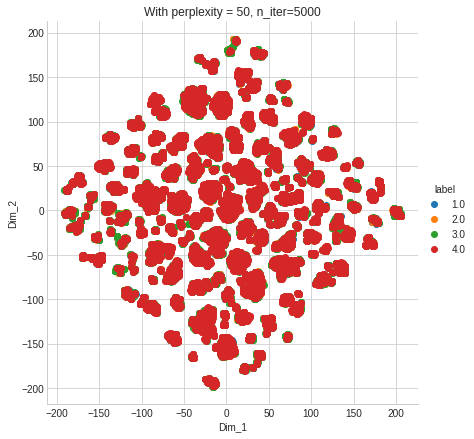

In [ ]:
# TSNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=50,  n_iter=5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(all_data_new)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, all_data_new_class_T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

PERFORM PCA and T-SNE using StandardScaler and visualizing

In [ ]:
all_data_new=pd.read_csv('/content/Drug_Marketing/Drug_Marketing/all_data_new.csv')

In [ ]:
all_data_new_class = all_data_new['physician_segment_ordinal'].values
all_data_new = all_data_new.drop(['physician_segment_ordinal'], axis=1)

In [ ]:
all_data_new = pd.get_dummies(all_data_new, columns = category_cols)

In [ ]:
from sklearn.preprocessing import StandardScaler
features = numerical_cols
#autoscaler = MinMaxScaler()
autoscaler = StandardScaler()
all_data_new[features] = autoscaler.fit_transform(all_data_new[features])

In [ ]:
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(all_data_new)

In [ ]:
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (48703, 2)


In [ ]:
all_data_new_class = all_data_new_class.reshape(-1,1)

In [ ]:
print("shape of all_data_new_class.shape = ", all_data_new_class.shape)

shape of all_data_new_class.shape =  (48703, 1)


In [ ]:
all_data_new_class_T=all_data_new_class.T
print('all_data_new_class_T.shape',all_data_new_class_T.shape)

all_data_new_class_T.shape (1, 48703)


In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, all_data_new_class_T)).T

In [ ]:
# attaching the label for each 2-d data point 
#pca_data = np.vstack((pca_data.T, all_data_new_class_T)).T

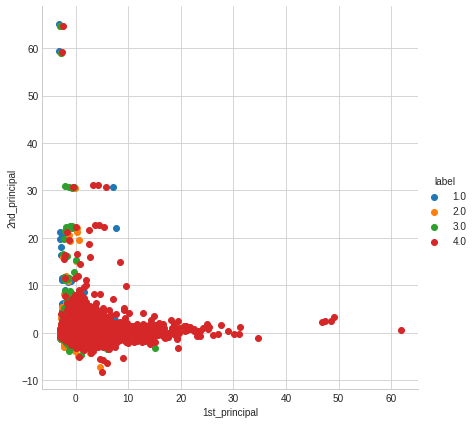

In [ ]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

<Figure size 432x288 with 0 Axes>

(-1.5, 31.5, 0.1514595328554437, 1.0404066889116454)

Text(0.5, 0, 'n_components')

Text(0, 0.5, 'Cumulative_explained_variance')

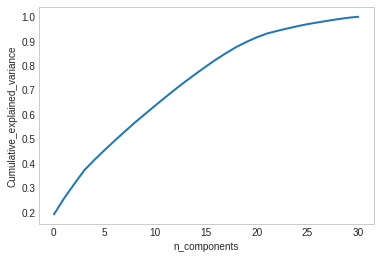

In [ ]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 31
pca_data = pca.fit_transform(all_data_new)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

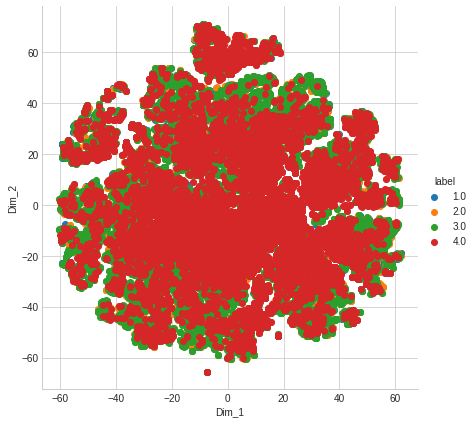

In [ ]:
# If we take 200-dimensions, approx. 90% of variance is expalined.

#TSNE :

# TSNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(all_data_new)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, all_data_new_class_T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

Text(0.5, 1.0, 'With perplexity = 50, n_iter=5000')

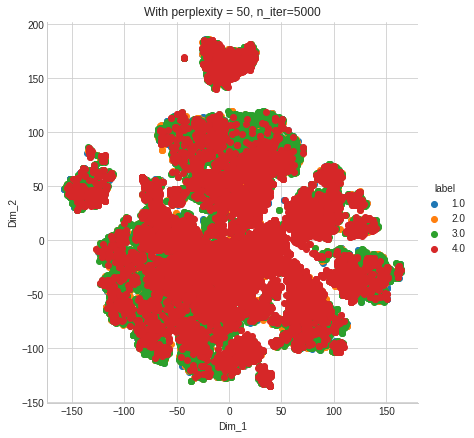

In [ ]:
# TSNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=50,  n_iter=5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(all_data_new)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, all_data_new_class_T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

# EVEN WITH PCA WE SEE THERE IS A LOT OF OVERLAP BETWEEN ALL THE CLASSES

# **FINAL EDA CONCLUSIONS:**

***1. FROM CATEGORICAL VARIABLES EDA*** 

Below are the variables which impact

**Q. Does gender impact on the physician segment?**

A. Yes, as you can see Very High and High Category percentage is more for Male population, than Female. For Female population we see that Medium and Low constitute more percentage

**Q. Does physician speciality impact on the physician segment?**

A. Yes the physician with speciality in nephrology tend to prescribe more than the urology and others category

***2. FROM NUMERICAL VARIABLES EDA***

Below are the variables which impact

**Q. Does brand_prescribed impact on the physician segment?**

A. Yes, if brand is prescribed the previous quarters, it is more likely that physician will prescribe it in next quarter.

**Q. Does total_representative_visits impact on the physician segment?**

A. Yes, from the distribution chart we see that if the no of representative visits are high, then there is maximum chance that the physician will prescribe the medicine.

**Q. Does total_sample_dropped impact on the physician segment?**

A. Yes, it certainly impacts as we are seeing maximum distribution for the 2 segments (Very High and High Categories)

**Q. Does physician_hospital_affiliation impact on the physician segment?**

A. Yes, it looks like lot of physicians do not have hospital affiliations and are more likely to prescribe the medicines.

**Q. Does physician_in_group_practice impact on the physician segment?**

A. Yes, from the distribution chart we see that if the physician is in group setup then he is more likely to prescribe the medicine.

**Q. Does total_prescriptions_for_indication1, total_prescriptions_for_indication2, total_prescriptions_for_indication3 impact on the physician segment?**

A. For total_prescriptions_for_indication1, and total_prescriptions_for_indication3 definitely have greater distribution for the segment 'Very High' and 'High', and lesser distribution for 'Low' and 'Medium'. For total_prescriptions_for_indication2 we do not see any proper distribution to infer

**Q. Does total_patient_with_commercial_insurance_plan impact on the physician segment?**

A. Yes, certainly we see fatter distributions for 'High' and 'Very High' category

**Q. Does total_patient_with_medicare_insurance_plan impact on the physician segment?**

A. Yes, certainly we see fatter distributions for 'Very High' category

**Q. Does total_patient_with_medicaid_insurance_plan impact on the physician segment?**

A. We have checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High' and for remaining categories it is almost same

**Q. Does brand search and web search related columns impact on the physician segment?**

A. There are about 6 variables, and have tried checking PDF, CDF, box plots, percentiles etc. As we could not find any pattern, cannot make any inference.

**Q. Does total_competitor_prescription impact on the physician segment?**

A. Plotted the distribution Chart, and Violin plots, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much.

**Q. Does new_prescriptions impact on the physician segment?**

A. Plotted the distribution Chart, and Violin plots, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much. we also see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

**Q. Does locality related columns impact on the physician segment?**

A. Could not find out proper pattern, so cannot make any inference.

**Q. Does physician age and tenure related columns impact on the physician segment?**

A. Could not find out proper pattern, so cannot make any inference. Except for the fact that the 'Very High' segment had slightly more tenure and more age for a physician.

**Q. Does PCA and TSNE help in visualizing the different physician segments?**

A. No Even, PCA and TSNE did not help in visualizing the separability between muliple class lables



# So, out of Total 31 variables, we see that 2 categorical variables, and 12 Numerical Variables look more important than other variables

# REFERENCES USED


In [ ]:
#Reference 1: https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1
#Reference 2: https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
#Reference 3: https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/
#Reference 4: https://towardsdatascience.com/the-subtlety-of-spearmans-rank-correlation-coefficient-29478653bbb9
#Reference 5: https://stackoverflow.com/questions/49534882/how-do-i-calculate-a-spearman-rank-correlation-in-pandas
#Reference 6: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/